# Jupyter notebook to treat the data gathered with the SLR

In this notebook we will try to compute multiples values : 
* Total number of experience
* Total number of experience by year
* Classical statistiques about the number of experience by paper
* The usage of public database over the experiences (total number, percentage, repartition over the years etc.)
* Statistics about each methods (number of differents methodes used for each parameters etc)

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import math
from matplotlib.pyplot import cm

sns.set(style="white")

from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
color_map = [name for hsv, name in by_hsv]

color_map_filter_green=[
    'red',
    'green',
    'blue',
    'olive', 
    'purple',
    'olivedrab',
    'lawngreen',
    'darkolivegreen',
    'orange',
    'yellowgreen',
    'greenyellow',
    'chartreuse',
    'pink',
    'darkseagreen',
    'palegreen',
    'violet',
    'cyan',
    'black',
    'lightgreen',
    'forestgreen',
    'limegreen',
    'deeppink',
    'darkblue',
    'yellow',
    'tomato',
    'darkgreen',
    'green',
    'lime',
    'mediumspringgreen',
    'springgreen',
    'mediumseagreen',
    'snow',
    'mediumaquamarine','aquamarine','olive','gold','cyan','grey','peru']

color_map_filter_pink=['blue','red','purple',
                'olive','fuchsia','olivedrab','cyan','yellowgreen','orange','white',
                'chartreuse','royalblue','yellow','teal','violet','lime','deeppink',
                'black','springgreen','snow','slategrey','gold','aquamarine','maroon',
                'blueviolet','crimson','dodgerblue','chocolate','palegreen','navy','beige','azure','sienna',
                'silver','mediumseagreen','firebrick','lightgreen','indigo','orchid','darkgrey','linen',
                'darkgoldenrod','darkcyan','lightpink','forestgreen','tomato',
                'aliceblue','palevioletred','powderblue','rebeccapurple','gainsboro',
                'paleturquoise','darkkhaki','mintcream','papayawhip','salmon','midnightblue','magenta','chartreuse','coral','oldlace','wheat','olive','fuchsia','olivedrab','cyan','yellowgreen','orange','white',
                'chartreuse','royalblue','yellow','teal','violet','lime','deeppink']

random.shuffle(color_map)

## Classical statistics about the experiments


In [379]:
exp_df=pd.read_csv("./all_exp_v2.csv",delimiter=';')
exp_df=exp_df.drop('NONE',axis=1)
exp_df['paper_year']=[re.findall(r'\d+',p)[0] for p in exp_df['paper']]

## Clean the dataset

exp_df.loc[exp_df['Dataset'] == 'CUSTOM 1', 'Dataset'] = 'CUSTOM'
exp_df.loc[exp_df['Dataset'] == 'CUSTOM 2', 'Dataset'] = 'CUSTOM'
exp_df.loc[exp_df['Dataset'] == 'CUSTOM 1 + CUSTOM 2', 'Dataset'] = 'CUSTOM'
exp_df.loc[exp_df['Dataset'] == 'Biosec1', 'Dataset'] = 'Biosec 1'
exp_df.loc[exp_df['Dataset'] == 'Biosec2', 'Dataset'] = 'Biosec 2'
exp_df.loc[exp_df['Dataset'] == 'Biosec3', 'Dataset'] = 'Biosec 2'
exp_df.loc[exp_df['Dataset'] == 'PRRB', 'Dataset'] = 'Capnobase IEEE TBME'
exp_df.loc[exp_df['Dataset'] == 'PRBB', 'Dataset'] = 'Capnobase IEEE TBME'




exp_df.loc[exp_df['Segmentation'] == 'Single cycles', 'Segmentation'] = 'Single cycle'
exp_df.loc[exp_df['Segmentation'] == 'Single Cycles', 'Segmentation'] = 'Single cycle'
exp_df.loc[exp_df['Segmentation'] == 'single pulse', 'Segmentation'] = 'Single cycle'
exp_df.loc[exp_df['Segmentation'] == '30 cycle', 'Segmentation'] = '30 cycles'

exp_df.loc[exp_df['Normalization'] == 'Zero mean', 'Normalization'] = 'Zero mean normalization'
exp_df.loc[exp_df['Normalization'] == 'zero mean', 'Normalization'] = 'Zero mean normalization'

exp_df.loc[exp_df['Features type'] == 'DTW', 'Features type'] = 'DTW domain'
exp_df.loc[exp_df['Features type'] == 'DTW ', 'Features type'] = 'DTW domain'
exp_df.loc[exp_df['Features type'] == 'DWT ', 'Features type'] = 'DWT domain'
exp_df.loc[exp_df['Features type'] == 'DWT', 'Features type'] = 'DWT domain'
exp_df.loc[exp_df['Features type'] == 'DWT', 'Features type'] = 'DWT domain'

exp_df.loc[exp_df['Features type'] == 'Frequency features', 'Features type'] = 'Frequency domain'
exp_df.loc[exp_df['Features type'] == 'Freuqency domain', 'Features type'] = 'Frequency domain'
exp_df.loc[exp_df['Features type'] == 'IN', 'Features type'] = 'Interpolation in frequency (IN) domain'
exp_df.loc[exp_df['Features type'] == 'IN Domain', 'Features type'] = 'Interpolation in frequency (IN) domain'
exp_df.loc[exp_df['Features type'] == 'Time + Frequency', 'Features type'] = 'Time + Frequency domain'
exp_df.loc[exp_df['Features type'] == 'Temporal & frequency domain', 'Features type'] = 'Time + Frequency domain'
exp_df.loc[exp_df['Features type'] == 'Time domain + frequency domain', 'Features type'] = 'Time + Frequency domain'
exp_df.loc[exp_df['Features type'] == 'Wavelet decomposition domain', 'Features type'] = 'DWT domain'

exp_df.loc[exp_df['Features type'] == 'Zero Padding', 'Features type'] = 'Zero padding in Time (ZT) domain'
exp_df.loc[exp_df['Features type'] == 'ZT', 'Features type'] = 'Zero padding in Time (ZT) domain'
exp_df.loc[exp_df['Features type'] == 'ZT domain', 'Features type'] = 'Zero padding in Time (ZT) domain'
exp_df.loc[exp_df['Features type'] == 'ZT + IN domain', 'Features type'] = 'Zero padding in Time (ZT) + Interpolation in Frequency (IN) domain'


exp_df.loc[exp_df['Feature length'] == 'full cycle', 'Feature length'] = 'One single cycle'

exp_df.loc[exp_df['Algorithm type'] == 'Deep Learning CNN', 'Algorithm type'] = 'Deep learning'
exp_df.loc[exp_df['Algorithm type'] == 'Deep Learning', 'Algorithm type'] = 'Deep learning'
exp_df.loc[exp_df['Algorithm type'] == 'Machine Learning', 'Algorithm type'] = 'Machine learning'
exp_df.loc[exp_df['Algorithm type'] == 'Deep Learning ', 'Algorithm type'] = 'Deep learning'
exp_df.loc[exp_df['Algorithm type'] == 'Distance', 'Algorithm type'] = 'Template Matching'
exp_df.loc[exp_df['Algorithm type'] == 'Correlation between template and input', 'Algorithm type'] = 'Template Matching'
exp_df.loc[exp_df['Algorithm type'] == 'Euclidian distance', 'Algorithm type'] = 'Template Matching'
exp_df.loc[exp_df['Algorithm type'] == '1DCNN + Distance matching (GASF)', 'Algorithm type'] = 'Deep learning + distance mathing'



exp_df.loc[exp_df['Architecture'] == 'SVM + RBF', 'Architecture'] = 'SVM with RBF'
exp_df.loc[exp_df['Architecture'] == 'SVM - RBF', 'Architecture'] = 'SVM with RBF'
exp_df.loc[exp_df['Architecture'] == 'NB', 'Architecture'] = 'Naives Bayes Classifier'
exp_df.loc[exp_df['Architecture'] == 'NBC', 'Architecture'] = 'Naives Bayes Classifier'
exp_df.loc[exp_df['Architecture'] == 'Naives Bayes', 'Architecture'] = 'Naives Bayes Classifier'
exp_df.loc[exp_df['Architecture'] == 'QDA', 'Architecture'] = 'Quadratic Discriminent Analysis'
exp_df.loc[exp_df['Architecture'] == 'SVM ', 'Architecture'] = 'SVM'
exp_df.loc[exp_df['Architecture'] == 'SVM Linear', 'Architecture'] = 'Linear SVM'

exp_df.loc[exp_df['Validation method'] == 'L2 regularization + 10-fold validation', 'Validation method'] = '10 fold cross validataion + L2-regularization'
exp_df.loc[exp_df['Validation method'] == '97,90%', 'Validation method'] = None
exp_df.loc[exp_df['Validation method'] == 'None', 'Validation method'] = None
exp_df.loc[exp_df['Validation method'] == '92,70%', 'Validation method'] = None






total_exp=exp_df['paper'].count()
exp_df.head()


paper              Dataset    Segmentation  \
0  donida2021biometric  Capnobase IEEE TBME     20s signals   
1  donida2021biometric  Capnobase IEEE TBME     20s signals   
2      bastos2021smart                MIMIC    Single cycle   
3      bastos2021smart  Capnobase IEEE TBME    Single cycle   
4        yang2021study                BIDMC  Sliding window   

             Normalization                          Noise reduction  \
0                      NaN                 band-pass filter 50-90Hz   
1                      NaN                 band-pass filter 50-90Hz   
2                      NaN  Lowpass Chebychev type I (no parameter)   
3                      NaN  Lowpass Chebychev type I (no parameter)   
4  Zero mean normalization                                     None   

                                Features type    Feature length  \
0  Create a spectrogram image from 3 channels                10   
1  Create a spectrogram image from 3 channels                10   
2                  Specific waves correlation  One single cycle   
3                  Specific waves correlation  One single cycle   
4                                 Time domain                17   

             Feature extraction or selection methods     Algorithm type  \
0  Create a spectrogram from the PPG chanels & us...   Machine learning   
1  Create a spectrogram from the PPG chanels & us...   Machine learning   
2                                     Mean the waves  Template Matching   
3                                     Mean the waves  Template Matching   
4                        defined time domain measure   Machine learning   

          Architecture                   Training dataset  \
0  SVM & voting system                                50%   
1  SVM & voting system                             87,50%   
2                  NaN    2 first minutes of all patients   
3                  NaN    2 first minutes of all patients   
4                 LDC   80% of all signal of each subject   

                  Evaluation dataset        Validation method Accuracy  EER  \
0                                50%  2 cross fold validation   99,03%  NaN   
1                             12,50%  8 cross fold validation   99,16%  NaN   
2        last minute of all patients                      NaN   96,88%  NaN   
3        last minute of all patients                      NaN   99,15%  NaN   
4  20% of all signal of each subject                      NaN   87,33%  NaN   

  Lowest FMR Lowest FMNR paper_year  
0      0,73%      12,87%       2021  
1      0,56%      13,50%       2021  
2        NaN         NaN       2021  
3        NaN         NaN       2021  
4        NaN         NaN       2021

In [380]:
exp_df.describe()

paper Dataset  Segmentation Normalization  \
count                   603     603           587           351   
unique                   44      18            18            17   
top     kavsaouglu2014novel  CUSTOM  Single cycle          None   
freq                    120     173           291           142   

          Noise reduction Features type Feature length  \
count                 445           602            422   
unique                 34            46             44   
top     FIR Low pass 10Hz   Time domain              5   
freq                  120           135             35   

        Feature extraction or selection methods    Algorithm type  \
count                                       594               603   
unique                                       74                 5   
top     Fiducial on raw, 1st and 2nd derivative  Machine learning   
freq                                        120               367   

                   Architecture Training dataset Evaluation dataset  \
count                       598              526                516   
unique                       61               30                 23   
top     Naives Bayes Classifier              50%                50%   
freq                         66              127                127   

                                    Validation method Accuracy    EER  \
count                                             128      514    190   
unique                                              6      384    134   
top     10 fold cross validataion + L2-regularization  100,00%  0,10%   
freq                                              105       12     11   

       Lowest FMR Lowest FMNR paper_year  
count           6           6        603  
unique          6           6         13  
top         0,73%      12,87%       2020  
freq            1           1        177

In [381]:
# Get the total exp per year
goup_by_year_df=exp_df.groupby('paper_year')
goup_by_year_df.describe()

paper                                          Dataset         \
           count unique                          top freq   count unique   
paper_year                                                                 
2003           2      2  gu2003photoplethysmographic    1       2      1   
2007           1      1                 yao2007pilot    1       1      1   
2011           2      1       spachos2011feasibility    2       2      2   
2013           4      3       salanke2013enhancement    2       4      1   
2014         120      1          kavsaouglu2014novel  120     120      1   
2015           5      2       jaafar2015acceleration    4       5      2   
2016          17      5          sarkar2016biometric    8      17      5   
2017          18      2            karimian2017human   12      18      1   
2018          69      7          sancho2018biometric   48      69      7   
2019          18      6              lee2019wearable   12      18      6   
2020         177      5          hwang2020evaluation   81     177      7   
2021          91      6                yang2021study   42      91      7   
2022          79      3                  liu2022time   53      79      5   

                                                                    \
                                                          top freq   
paper_year                                                           
2003                                                   CUSTOM    2   
2007                                                   CUSTOM    1   
2011                                   OpenSignal PPG Dataset    1   
2013                                                   CUSTOM    4   
2014                                                   CUSTOM  120   
2015                                                    MIMIC    4   
2016                                                    DEAP     8   
2017                                      Capnobase IEEE TBME   18   
2018        Capnobase IEEE TBME + MIMIC II + Nonin + Berry...   24   
2019                                      Capnobase IEEE TBME   12   
2020                                      Capnobase IEEE TBME   41   
2021                                      Capnobase IEEE TBME   23   
2022                                                    BIDMC   26   

           Segmentation         ...     EER      Lowest FMR                \
                  count unique  ...     top freq      count unique    top   
paper_year                      ...                                         
2003                  1      1  ...     NaN  NaN          0      0    NaN   
2007                  1      1  ...     NaN  NaN          0      0    NaN   
2011                  2      1  ...   0,50%    1          0      0    NaN   
2013                  4      1  ...   5,29%    1          0      0    NaN   
2014                120      1  ...     NaN  NaN          0      0    NaN   
2015                  5      1  ...     NaN  NaN          1      1  4,20%   
2016                 17      2  ...     29%    1          3      3    32%   
2017                 18      1  ...   15,35    1          0      0    NaN   
2018                 67      4  ...  24,60%    3          0      0    NaN   
2019                 16      7  ...   0,05%    1          0      0    NaN   
2020                166      3  ...   0,10%    6          0      0    NaN   
2021                 91      4  ...   0,10%    5          2      2  0,73%   
2022                 79      3  ...   2,80%    4          0      0    NaN   

                Lowest FMNR                      
           freq       count unique     top freq  
paper_year                                       
2003        NaN           0      0     NaN  NaN  
2007        NaN           0      0     NaN  NaN  
2011        NaN           0      0     NaN  NaN  
2013        NaN           0      0     NaN  NaN  
2014        NaN           0      0     NaN  NaN  
2015          1           1      1   3,7

## Dataset usage

In this section we will draw the different usage of the available datasets over the years.
We have 20 differents datasets categories. We have one categroy to represent each publicly available dataset, plus one which gater all the custom dataset. A custom dataset represent a dataset gathered and not published by the authors of one study. Thus, all the experiences made with a custom dataset can not be reproduced. The details of each custom dataset is given in Table XX

Text(0.5, 1.0, 'Dataset usage over the experiences')

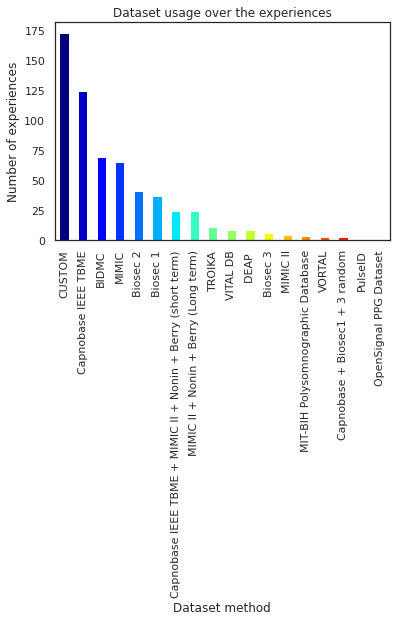

In [382]:
col_len=len(exp_df['Dataset'].unique())
color = cm.jet(np.linspace(0, 1, col_len))

ax=exp_df['Dataset'].value_counts().plot.bar(color=color)

ax.set_ylabel("Number of experiences")
ax.set_xlabel("Dataset method")
ax.set_title("Dataset usage over the experiences")

Text(0.5, 1.0, 'Proportion of the dataset usage')

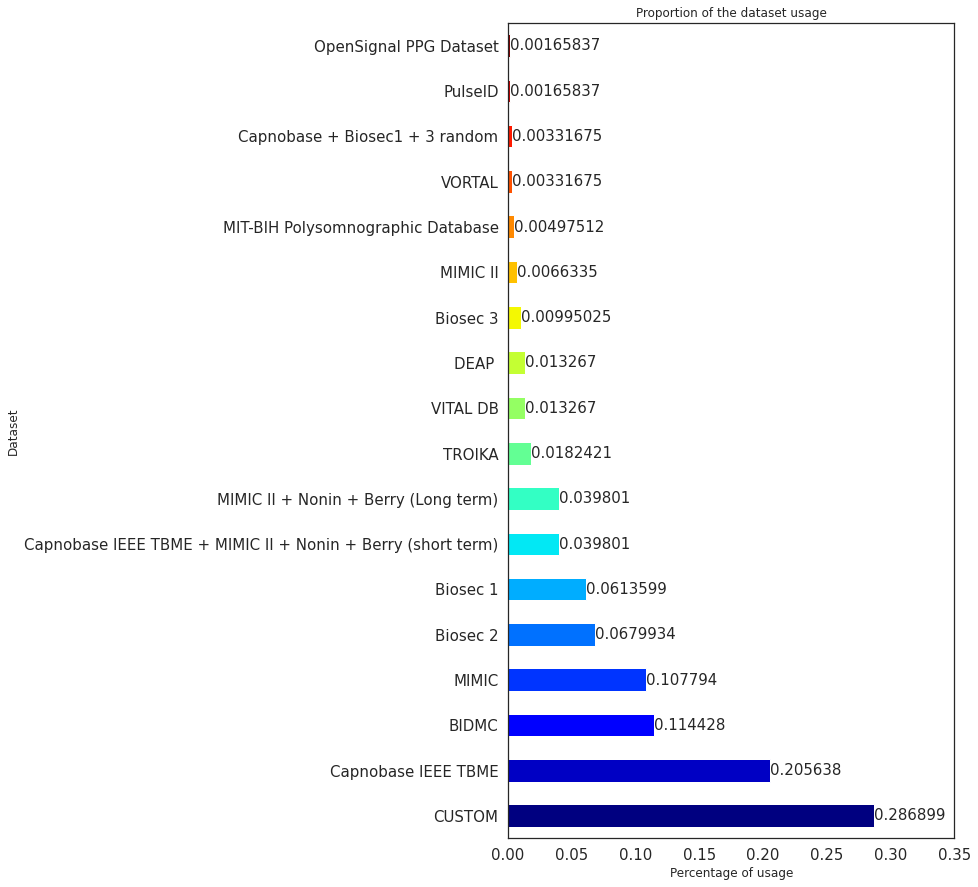

In [383]:
fig = plt.figure(figsize=(8, 15))
ax = exp_df['Dataset'].value_counts(normalize=True).plot.barh(fontsize=15,color=color)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 0.35])
ax.set_xlabel("Percentage of usage")
ax.set_ylabel("Dataset")
ax.set_title("Proportion of the dataset usage")


The first interesting thing to point is the massive usage of custom dataset usage over the total experiences. 28% of the experiments are made with a custom dataset. All of this experiences can not be reproduced. Then multiples publicly available dataset are used. However each experiences use a different subset of these dataset. In an ideal world, each experience must be done with all the available datasets.

Text(0.5, 1.0, 'Dataset usage over the experiences')

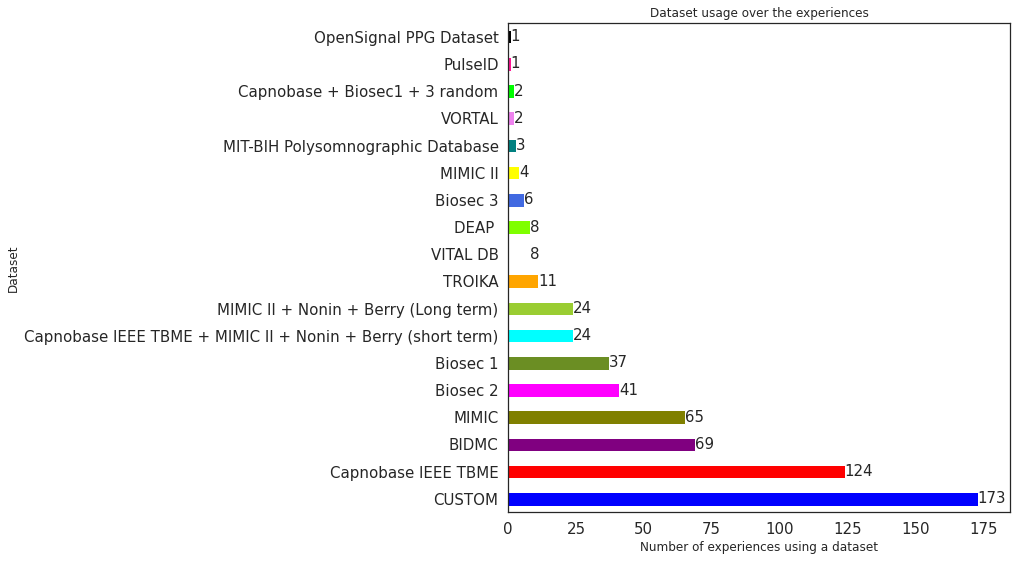

In [384]:
fig = plt.figure(figsize=(9, 9))
ax = exp_df['Dataset'].value_counts().plot.barh(fontsize=15,color=color_map_filter_pink)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 185])
ax.set_xlabel("Number of experiences using a dataset")
ax.set_ylabel("Dataset")
ax.set_title("Dataset usage over the experiences")

In [385]:

# Get the number of exp by paper

nb_exp_by_papers=exp_df.groupby('paper').count()["Dataset"]

## Create a new df with year, nb paper, nb exp

# Get the min and max year of the dataset
uniq_years=exp_df['paper_year'].unique()
min_y=int(exp_df['paper_year'].min())
max_y=int(exp_df['paper_year'].max())
years=np.arange(min_y,max_y+1) ## all the year

# Get the differents values for each criteria

# Dataset usage
dataset_by_exp=goup_by_year_df['Dataset'].value_counts().reset_index(name='Frequency')
print(dataset_by_exp)

exp_by_year=goup_by_year_df.count()['paper'].to_dict()
#print(exp_by_year) ## Total exp by year

# uniq number of paper by year
uniq_paper_by_year=goup_by_year_df["paper"].nunique().to_dict()
#print(uniq_paper_by_year) ## Number of paper by year



   paper_year                                            Dataset  Frequency
0        2003                                             CUSTOM          2
1        2007                                             CUSTOM          1
2        2011                                           Biosec 1          1
3        2011                             OpenSignal PPG Dataset          1
4        2013                                             CUSTOM          4
5        2014                                             CUSTOM        120
6        2015                                              MIMIC          4
7        2015                                             CUSTOM          1
8        2016                                              DEAP           8
9        2016                                           MIMIC II          4
10       2016                  MIT-BIH Polysomnographic Database          3
11       2016                                             CUSTOM          1
12       201

    years  paper_per_year  exp_by_year
0    2003               2            2
1    2004               0            0
2    2005               0            0
3    2006               0            0
4    2007               1            1
5    2008               0            0
6    2009               0            0
7    2010               0            0
8    2011               1            2
9    2012               0            0
10   2013               3            4
11   2014               1          120
12   2015               2            5
13   2016               5           17
14   2017               2           18
15   2018               7           69
16   2019               6           18
17   2020               5          177
18   2021               6           91
19   2022               3           79


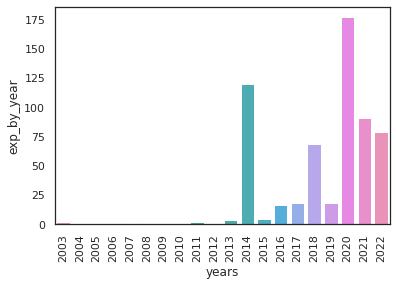

In [386]:
new_df_dict={'years':years.tolist(),'paper_per_year':[],'exp_by_year':[]}


for y in years :
    if str(y) in uniq_paper_by_year.keys() :
        new_df_dict['paper_per_year'].append(uniq_paper_by_year[str(y)])
    else :
        new_df_dict['paper_per_year'].append(0)
    if str(y) in exp_by_year.keys() :
        new_df_dict['exp_by_year'].append(exp_by_year[str(y)])
    else :
        new_df_dict['exp_by_year'].append(0)

new_df_years=pd.DataFrame.from_dict(data=new_df_dict,orient='columns')

print(new_df_years)
# paper_by_year=[]
# i=0
# for y in years :
#     if str(y) in uniq_years :
#         paper_by_year.append(exp_by_year['paper'][i])
#         i+=1
#     else : 
#         paper_by_year.append(0)
# print(paper_by_year)
g = sns.barplot(data=new_df_years, x='years', y='exp_by_year')
g.tick_params(axis='x', rotation=90)


In this first bar plot, we can observe a starting of the research about PPG biometric recognition in 2003. We can observe two big phases with few researchs between 2003 and 2013, then a second phase between 2014 and 2022 where the number of experiences increase a lot.
We can observe a big increase in 2014 with 120 differents experiences.

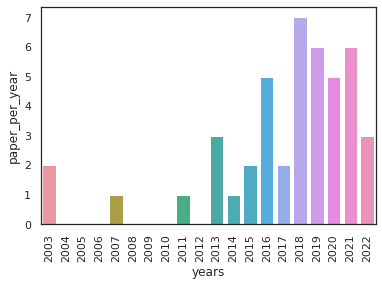

In [387]:
g = sns.barplot(data=new_df_years, x='years', y='paper_per_year')
g.tick_params(axis='x', rotation=90)

When we are looking at the number of papers per year we can observe that the two big phases that we drawn with the previous figure are good. However, only one paper was published in 2014, gathering all the 120 experiences. However the total number of published paper on this domain is still low. 

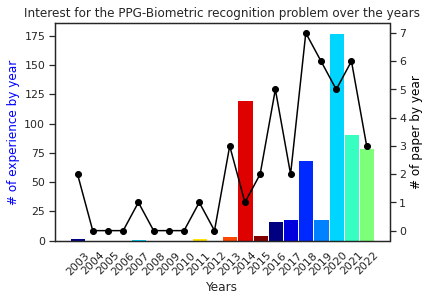

In [388]:
col_len=len(exp_df['paper_year'].unique())
color = cm.jet(np.linspace(0, 1, col_len))




fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(new_df_years['years'], new_df_years['exp_by_year'], width=1, align="center", tick_label=new_df_years['years'],color=color)
ax2.plot(new_df_years['years'], new_df_years['paper_per_year'], 'o-', color="black" )

ax1.set_xlabel('Years')
ax2.set_xlabel('Years')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('# of experience by year', color='blue')
ax2.set_ylabel('# of paper by year', color='black')
ax1.set_title("Interest for the PPG-Biometric recognition problem over the years")

plt.show()


In this figure, we fusion the two previous one, showing the increase of the interest for this domain around 2013-2014. However we can observe that most of the papers focuses on few experiences. Only few papers show more than ten experiences.

## Dataset usage over the years.

In [389]:
def add_new_line_in_label(label)-> str:
    if type(label) == type("c") :
        new_label=""
        words=label.split(" ")
        wc=0
        for w in words :
            new_label+=(w+" ")
            if w != "+":
                wc+=1
            if wc >= 3 :
                wc = 0
                new_label+="\n"


        return new_label.rstrip()
    else :
        return label

def plot_hist_hue(freq_df,col_name,x_labels,x_title,y_title,title,color_map):

    uniq_noise=freq_df[col_name].unique()
    nb_years=len(freq_df["paper_year"].unique().tolist())

    d_noise={d:[0]*len(x_labels) for d in uniq_noise}
    actual_year=x_labels[0]
    index_year=np.where(x_labels == actual_year)[0][0]
    for i in range(len(freq_df["paper_year"].to_list())) :
        y=freq_df["paper_year"][i]
        d_set=freq_df[col_name][i]
        f_dset=freq_df["Frequency"][i]
        if y != actual_year :
            actual_year = y
            index_year=np.where(x_labels == actual_year)[0][0]
            d_noise[d_set][index_year]+=f_dset
            # for key_d in [ v for v in d_noise.keys() if v != d_set]:
            #     d_noise[key_d].append(0)
        else :
            d_noise[d_set][index_year]+=f_dset

    
    width = 0.8 # the width of the bars
    d2=sorted(d_noise.items(),key=lambda t:sum(t[1]), reverse=True)
    #print(d2)
    d3={add_new_line_in_label(t[0]):t[1] for t in d2}
    #print("###################")
    #print(d3)
    nb_col=math.ceil(len(d_noise)/50)
    print("nb col = "+str(nb_col))
    fig_width=15+2*nb_col
    fig_height=25
    fig = plt.figure(figsize=(fig_width, fig_height))
    fig, ax = plt.subplots()

    ax.bar(x_labels, d3[add_new_line_in_label(d2[0][0])], width, label=add_new_line_in_label(d2[0][0]), color=color_map[0],edgecolor='black')
    bottom_d=np.array(d3[add_new_line_in_label(d2[0][0])])
    i=1
    for k in [ v for v in d3.keys() if v != add_new_line_in_label(d2[0][0])]:
        ax.bar(x_labels, d3[k], width, bottom=bottom_d,label=k,color=color_map[i],edgecolor='black')
        i+=1
        bottom_d+=np.array(d3[k])


    ax.set_ylabel(y_title,fontsize=20)
    ax.set_title(title,fontsize=20)
    ax.set_ylim([0, np.max(bottom_d)+10])
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', rotation=45)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.5, box.height * 2.5])

    # Put a legend to the right of the current axis
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=nb_col)
    plt.grid()
    plt.show()

['2003' '2007' '2011' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']
nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

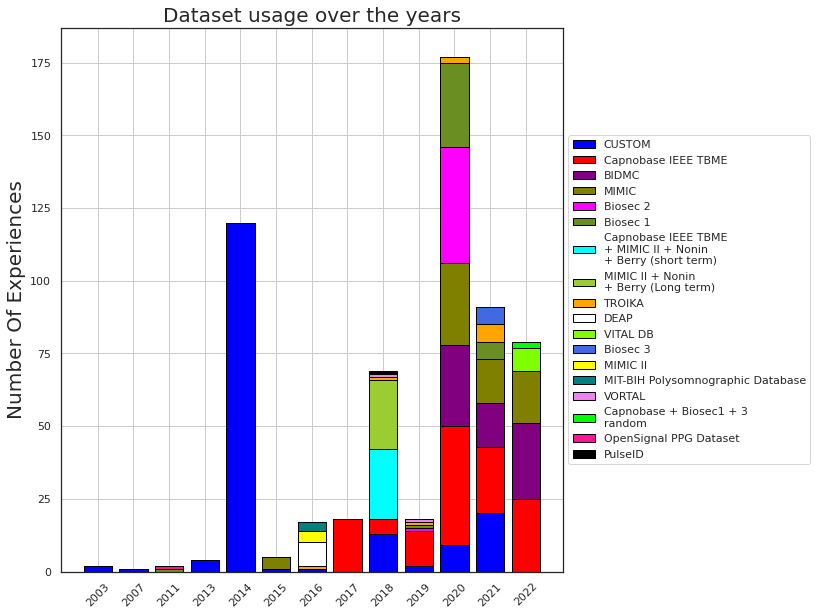

In [390]:
labels=dataset_by_exp["paper_year"].unique()
uniq_dataset=dataset_by_exp["Dataset"].unique()

print(labels)
random.shuffle(color_map)
plot_hist_hue(color_map=color_map_filter_pink,freq_df=dataset_by_exp,col_name="Dataset",x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Dataset usage over the years")


With this figure, we can observe that the custom dataset where mainly used in 2014 and before. few usages persist after but they are very low compare to all other dataset usages. In 2015 and after, we can observe a big diversity in the dataset usages. 

## Segmentation usage over the years

In this section we will study the evolution of the segmentation methods over the years.

587
percentage of missing values : 2.6533996683250414%


Text(0.5, 1.0, 'Segmentation methods usage over the experiences')

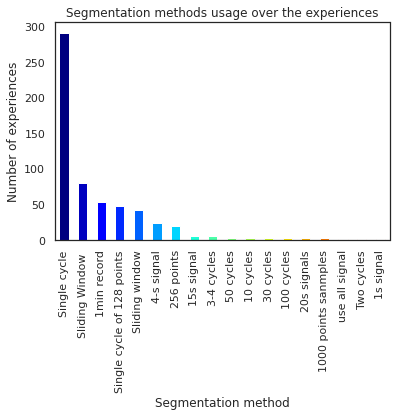

In [391]:
segmentation_by_exp=goup_by_year_df['Segmentation'].value_counts().reset_index(name='Frequency')
#print(segmentation_by_exp)
print(exp_df['Segmentation'].count())
percent_missing=((total_exp-exp_df['Segmentation'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Segmentation'].unique())
color = cm.jet(np.linspace(0, 1, col_len))

ax=exp_df['Segmentation'].value_counts().plot.bar(color=color)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Segmentation method")
ax.set_title("Segmentation methods usage over the experiences")


Text(0.5, 1.0, 'Proportion of the segmentation methods usage')

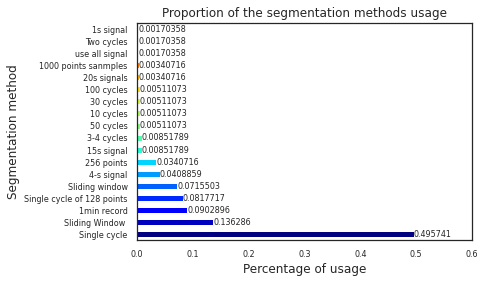

In [392]:
ax = exp_df['Segmentation'].value_counts(normalize=True).plot.barh(fontsize=8,color=color)
ax.bar_label(ax.containers[0],fontsize=8)
ax.set_xlim([0, 0.6])
ax.set_xlabel("Percentage of usage")
ax.set_ylabel("Segmentation method")
ax.set_title("Proportion of the segmentation methods usage")

Text(0.5, 1.0, 'Segmentation methods usage over the experiences')

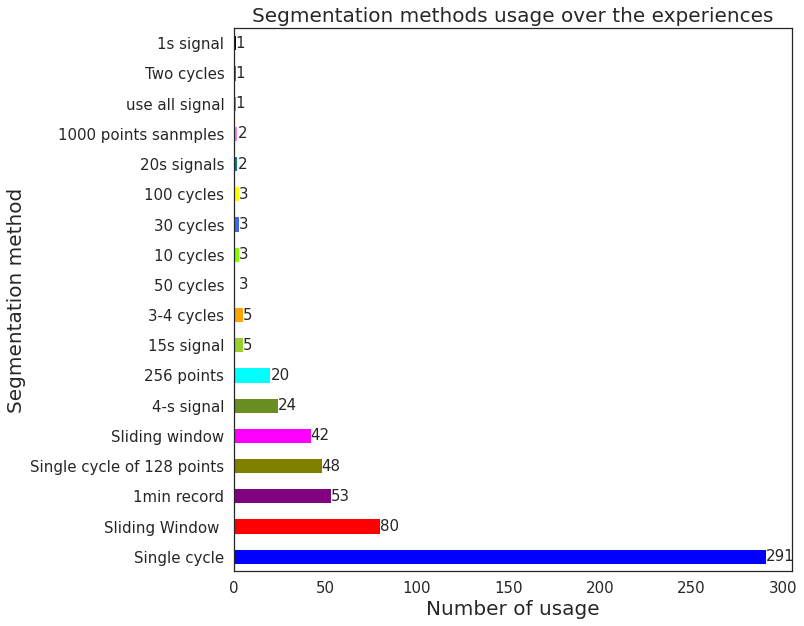

In [393]:
fig = plt.figure(figsize=(10, 10))
ax = exp_df['Segmentation'].value_counts().plot.barh(fontsize=15,color=color_map_filter_pink)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 305])
ax.set_xlabel("Number of usage",fontsize=20)
ax.set_ylabel("Segmentation method",fontsize=20)
ax.set_title("Segmentation methods usage over the experiences",fontsize=20)

First, we can see 18 different methods to segment the signal that will be used to classify the subjects. Virtually it exsits an infinity of methods because we have an infinity of possibility to segment a continuous signal. However a PPG signal is a cyclic signal so intuitivly we can assume that most of the information is contained in one cycle. 
With this first graph we observe that around half of the experiences works on a single cycle segmentation (49.5%). The other tested methods are the sliding windows and segmentation with fixed number of points or time. The goal is to have a equal size of each signal in number of point to facilitate the work of the classification algorithm. 
For this parameter we only observe a percentage of missing values (when authors does not provide this parameter) of 2.65%

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

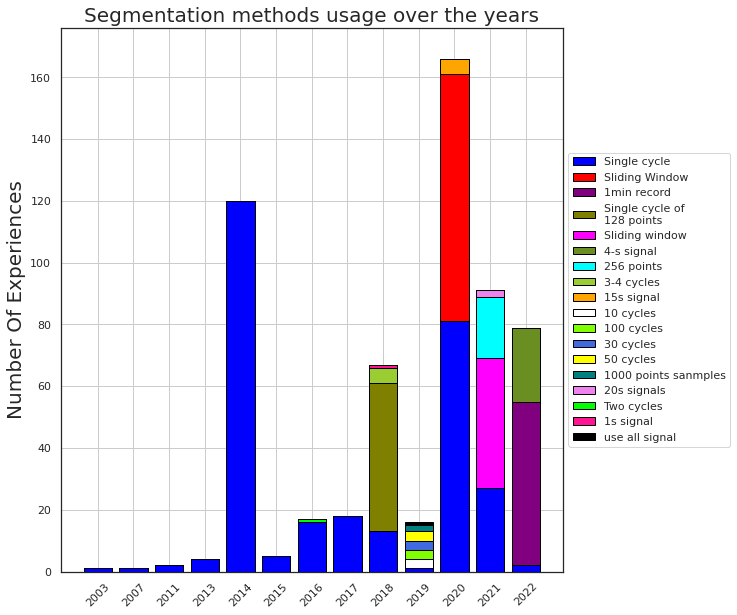

In [394]:
uniq_segmentation=segmentation_by_exp["Segmentation"].unique()

plot_hist_hue(freq_df=segmentation_by_exp,col_name="Segmentation",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Segmentation methods usage over the years",color_map=color_map_filter_pink)


With this graph we can see that the usage of the single cycle segmentation has been used in most of the years. We can not split the segmentation usage in big phases as we have done previously with the dataset usage. However, we can observe that moost of the other methods appears in 2018 and after. But none of them is reused over the years. 

## Normalization usages over the years

In this section we will study the usage of the normalization over the years. 

351
percentage of missing values : 41.7910447761194%


Text(0.5, 1.0, 'Normalization methods usage over the experiences')

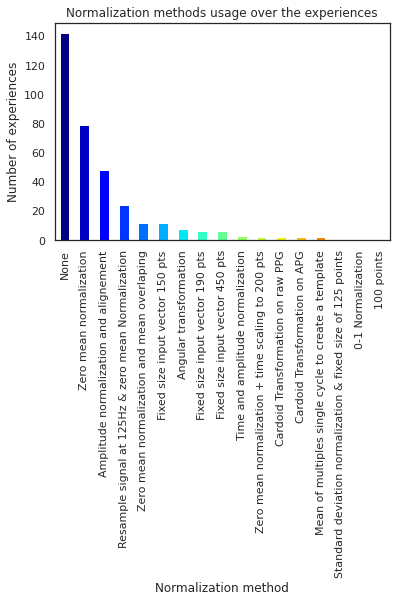

In [395]:
normalization_by_exp=goup_by_year_df['Normalization'].value_counts().reset_index(name='Frequency')
#print(segmentation_by_exp)
print(exp_df['Normalization'].count())
percent_missing=((total_exp-exp_df['Normalization'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")


col_len=len(exp_df['Normalization'].unique())
color = cm.jet(np.linspace(0, 1, col_len))

ax=exp_df['Normalization'].value_counts().plot.bar(color=color)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Normalization method")
ax.set_title("Normalization methods usage over the experiences")


Text(0.5, 1.0, 'Normalization methods usage (in percentage) over the experiences')

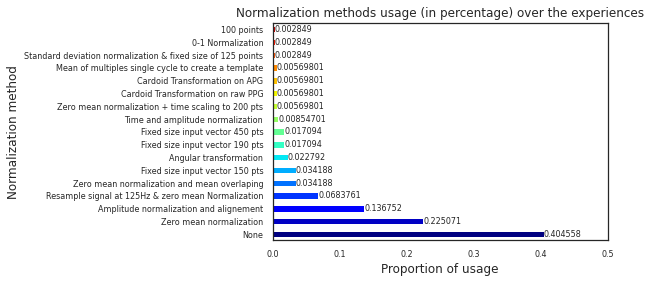

In [396]:
ax = exp_df['Normalization'].value_counts(normalize=True).plot.barh(fontsize=8, color=color)
ax.bar_label(ax.containers[0],fontsize=8)
ax.set_xlim([0, 0.50])
ax.set_ylabel("Normalization method")
ax.set_xlabel("Proportion of usage")
ax.set_title("Normalization methods usage (in percentage) over the experiences")

Text(0.5, 1.0, 'Normalization methods usage over the experiences')

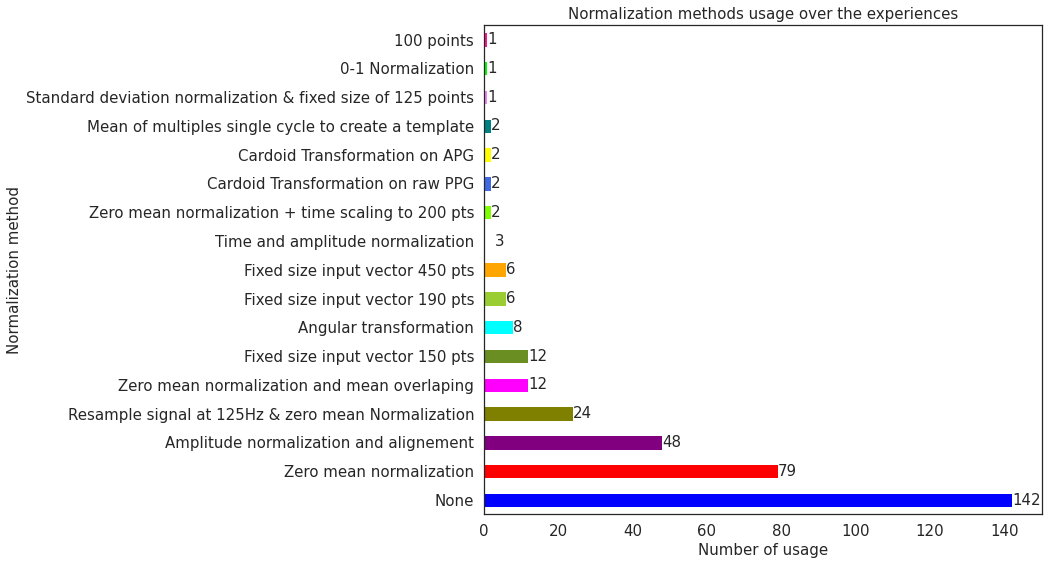

In [397]:
fig = plt.figure(figsize=(10, 9))
ax = exp_df['Normalization'].value_counts().plot.barh(fontsize=15, color=color_map_filter_pink)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 150])
ax.set_ylabel("Normalization method", fontsize=15)
ax.set_xlabel("Number of usage",fontsize=15)
ax.set_title("Normalization methods usage over the experiences",fontsize=15)

For this parameter the first thing to show is the hight number of missing values : 41.79%. 
Then in all the experience, the most used methods is to provide raw signal, with no normalization. Then the Zero Mean normalization is the second most employed method. 
We can observe 17 differents methods but most of them are little used. 

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

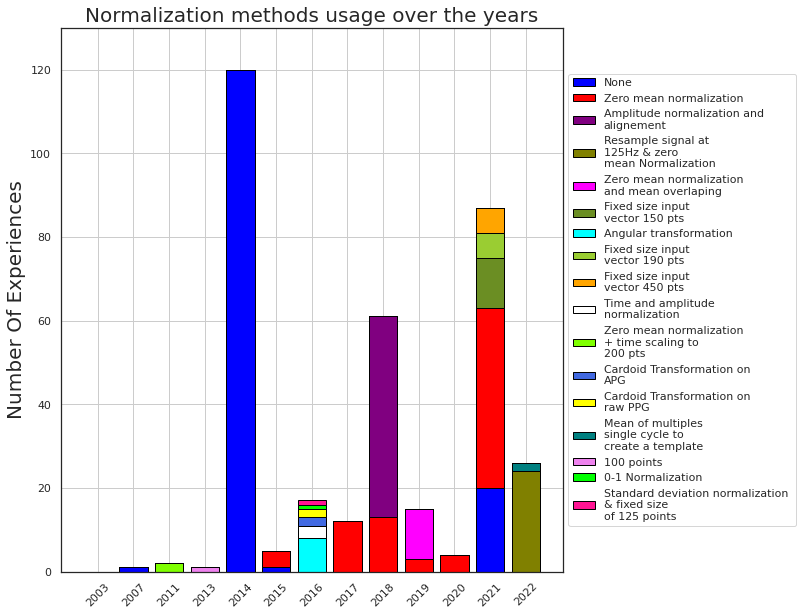

In [398]:
uniq_normalizationn=normalization_by_exp["Normalization"].unique()

plot_hist_hue(freq_df=normalization_by_exp,col_name="Normalization",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Normalization methods usage over the years",color_map=color_map_filter_pink)


With this graph, we can observe that the "None" methods was mainly used by one paper which made 120 experiences. This methods is the most present across the number of experiences but it is not the most used across the papers and the years. We can observe that the Zero Mean normalization is the most used across the papers and the most accepted across the comunity. 

## Noise Reduction

In this section we will study the differents methods used to reduce the noise of the PPG signal.

### V1

   paper_year                                    Noise reduction  Frequency
0        2007                               Low pass filter 60Hz          1
1        2013  Fourrier decomposition & recomposition with 10...          2
2        2013                                 Butterworth Filter          1
3        2014                                  FIR Low pass 10Hz        120
4        2015                                 Butterworth Filter          1
5        2016                                 Butterworth Filter          8
6        2016                                 Butterworth Filter          4
7        2016                         Gaussian derivative filter          3
8        2016                                 Butterworth Filter          1
9        2016                                 Butterworth Filter          1
10       2017                                 Butterworth Filter         12
11       2017                                 Butterworth Filter          6
12       201

Text(0.5, 1.0, 'Noise reduction methods usage over the experiences')

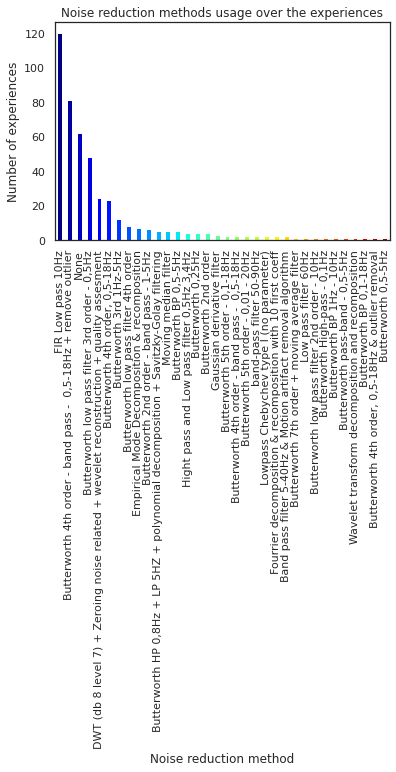

In [399]:
noise_by_exp=goup_by_year_df['Noise reduction'].value_counts().reset_index(name='Frequency')

noise_by_exp['Noise reduction'] = noise_by_exp['Noise reduction'].replace('^Butterworth .*', 'Butterworth Filter', regex=True)



print(noise_by_exp)
# print(exp_df['Noise reduction'].count())
percent_missing=((total_exp-exp_df['Noise reduction'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Noise reduction'].unique())
color = cm.jet(np.linspace(0, 1, col_len))

ax=exp_df['Noise reduction'].value_counts().plot.bar(color=color)
# ax=noise_by_exp['Noise reduction'].value_counts().plot.bar(color=color)

ax.set_ylabel("Number of experiences")
ax.set_xlabel("Noise reduction method")
ax.set_title("Noise reduction methods usage over the experiences")


Text(0.5, 1.0, 'Noise reduction methods usage (in percentage) over the experiences')

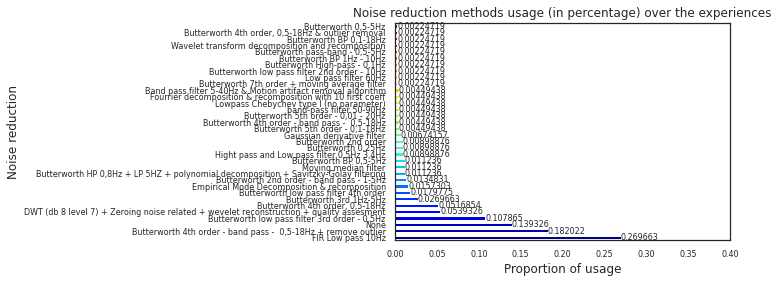

In [400]:
ax = exp_df['Noise reduction'].value_counts(normalize=True).plot.barh(fontsize=8, color=color)
ax.bar_label(ax.containers[0],fontsize=8)
ax.set_xlim([0, 0.40])
ax.set_ylabel("Noise reduction")
ax.set_xlabel("Proportion of usage")
ax.set_title("Noise reduction methods usage (in percentage) over the experiences")

### V2

Text(0.5, 1.0, 'Noise reduction methods usage over the experiences')

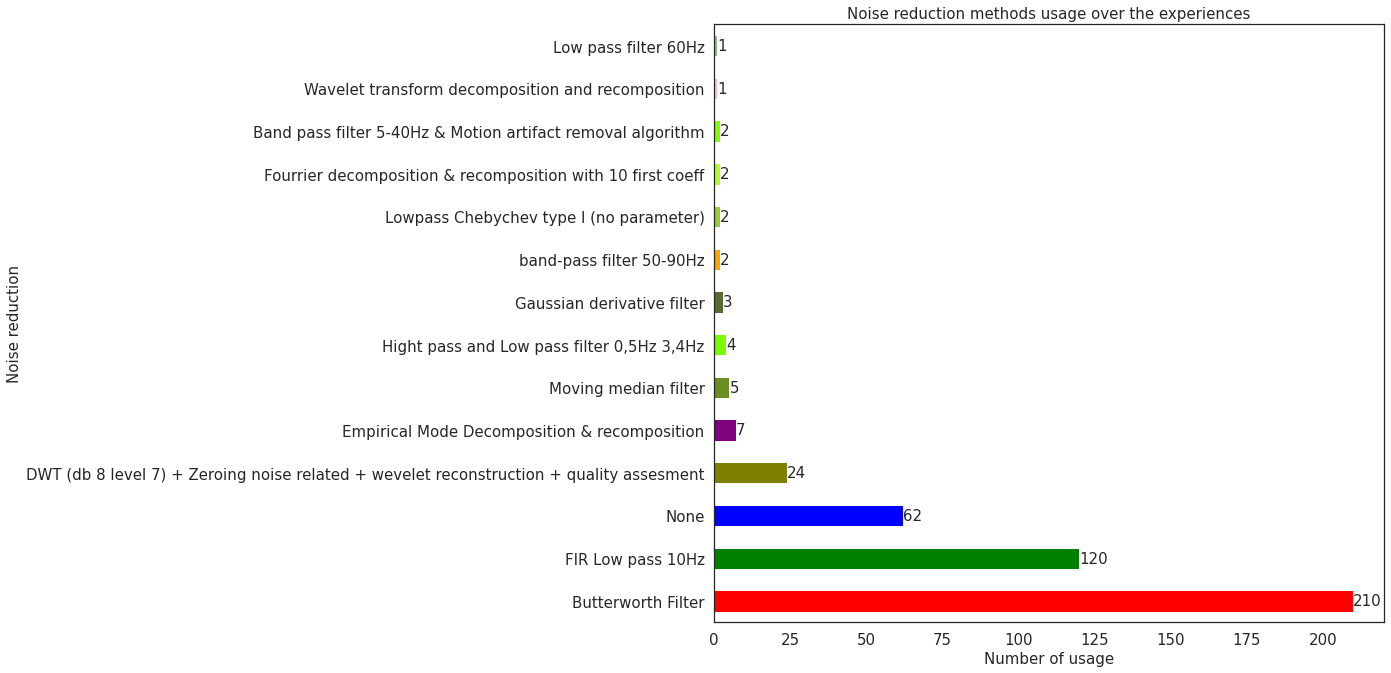

In [401]:
exp_df['Noise reduction'] = exp_df['Noise reduction'].replace('^Butterworth .*', 'Butterworth Filter', regex=True)


fig = plt.figure(figsize=(12, 11))
ax = exp_df['Noise reduction'].value_counts().plot.barh(fontsize=15, color=color_map_filter_green)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 220])
ax.set_ylabel("Noise reduction",fontsize=15)
ax.set_xlabel("Number of usage",fontsize=15)
ax.set_title("Noise reduction methods usage over the experiences",fontsize=15)

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

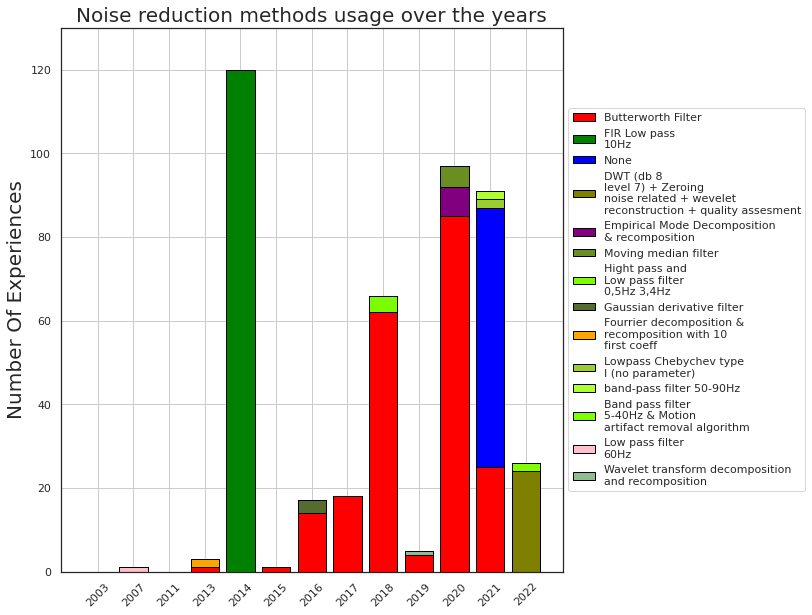

In [402]:
uniq_noise=noise_by_exp["Noise reduction"].unique()
#print(uniq_noise)


plot_hist_hue(freq_df=noise_by_exp,col_name="Noise reduction",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Noise reduction methods usage over the years",
    color_map=color_map_filter_green)


### Clean the Butterworth filter

Here we are gathering all the butterworth filter in one category

   paper_year                                    Noise reduction  Frequency
0        2007                               Low pass filter 60Hz          1
1        2013  Fourrier decomposition & recomposition with 10...          2
2        2013                                 Butterworth filter          1
3        2014                                  FIR Low pass 10Hz        120
4        2015                                 Butterworth filter          1
5        2016                                 Butterworth filter          8
6        2016                                 Butterworth filter          4
7        2016                         Gaussian derivative filter          3
8        2016                                 Butterworth filter          1
9        2016                                 Butterworth filter          1
10       2017                                 Butterworth filter         12
11       2017                                 Butterworth filter          6
12       201

/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

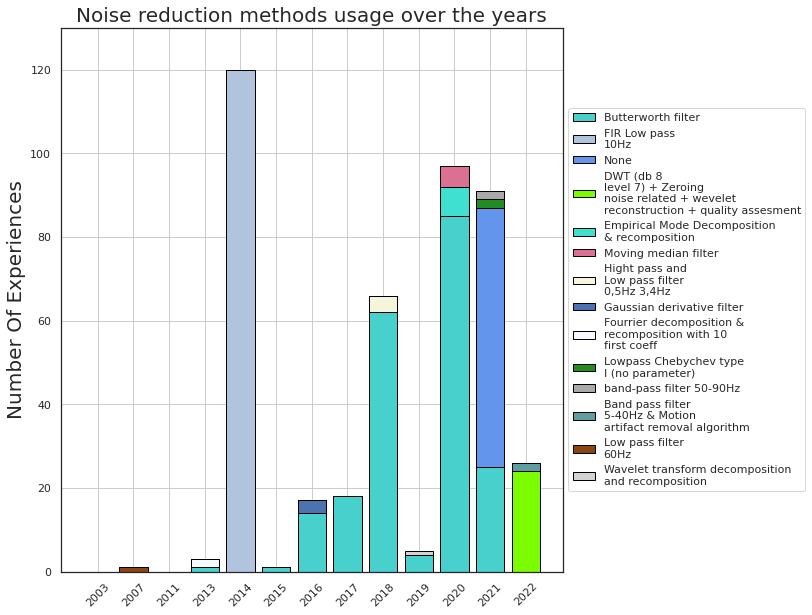

In [403]:
noise_by_exp.loc[noise_by_exp['Noise reduction'].str.contains('Butterworth'), 'Noise reduction'] = 'Butterworth filter'
print(noise_by_exp)


plot_hist_hue(freq_df=noise_by_exp,col_name="Noise reduction",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Noise reduction methods usage over the years",color_map=color_map)

First we can observe a higth percentage of missing values : 26,20%. Then we observe hight diversity in methods with 34 differents methods.
However most of them are Butterworth filter with differents thresholds. If we gather all the Butterworth filter in one category, we can observe that it's the most used category. This also reduce to 14 differents methods used by the communitiy. The butterworth filter has been widely used between 2016 and 2021. Test on other kinds of filter must be done. A dedicated study must be done on the frequency threshold and the order of the filter the we need to use. Currently all the study use a different set of parameter to filter the noise without any comparison. 

## Features type over the years

In this section we will study the differents kinds of features extracted by the researchers over the years.

   paper_year                     Features type  Frequency
0        2003                          Fiducial          2
1        2007                          Fiducial          1
2        2011                      Statistical           2
3        2013  Diagonal Dominant representation          2
4        2013                              KPCA          1
..        ...                               ...        ...
58       2022         Whole signal PPG, VPG APG         24
59       2022                  Frequency domain          9
60       2022                       Time domain          9
61       2022                     Multi Wavelet          1
62       2022                    Scalar Wavelet          1

[63 rows x 3 columns]
602
percentage of missing values : 0.16583747927031509%


Text(0.5, 1.0, 'Features type usage over the experiences')

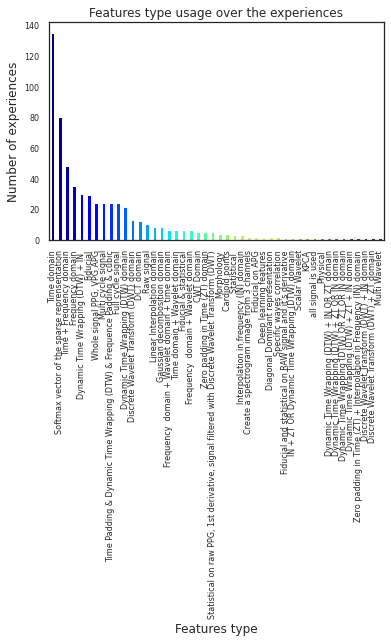

In [404]:
feature_type_by_exp=goup_by_year_df['Features type'].value_counts().reset_index(name='Frequency')

exp_df['Features type'] = exp_df['Features type'].replace('DWT', 'Discrete Wavelet Transform (DWT)', regex=True)
exp_df['Features type'] = exp_df['Features type'].replace('DTW', 'Dynamic Time Wrapping (DTW)', regex=True)


print(feature_type_by_exp)
print(exp_df['Features type'].count())
percent_missing=((total_exp-exp_df['Features type'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Features type'].unique())
color = cm.jet(np.linspace(0, 1, col_len))

ax=exp_df['Features type'].value_counts().plot.bar(color=color,fontsize=8)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Features type")
ax.set_title("Features type usage over the experiences")




Text(0.5, 1.0, 'Features type usage in proportion over the experiences')

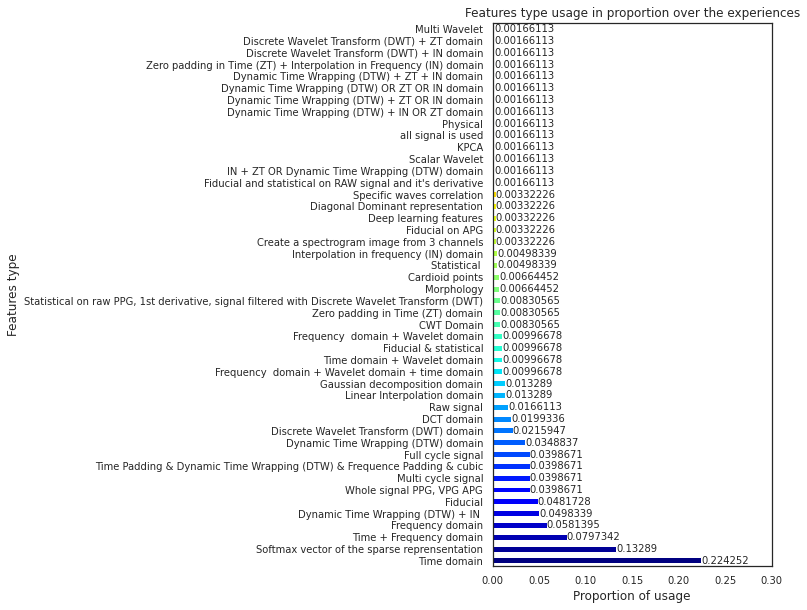

In [405]:
fig = plt.figure(figsize=(5, 10))
ax = exp_df['Features type'].value_counts(normalize=True).plot.barh(fontsize=10, color=color)
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlim([0, 0.30])
ax.plot(figsize=(8,8))
ax.set_ylabel("Features type")
ax.set_xlabel("Proportion of usage")
ax.set_title("Features type usage in proportion over the experiences")

Text(0.5, 1.0, 'Features type usage over the experiences')

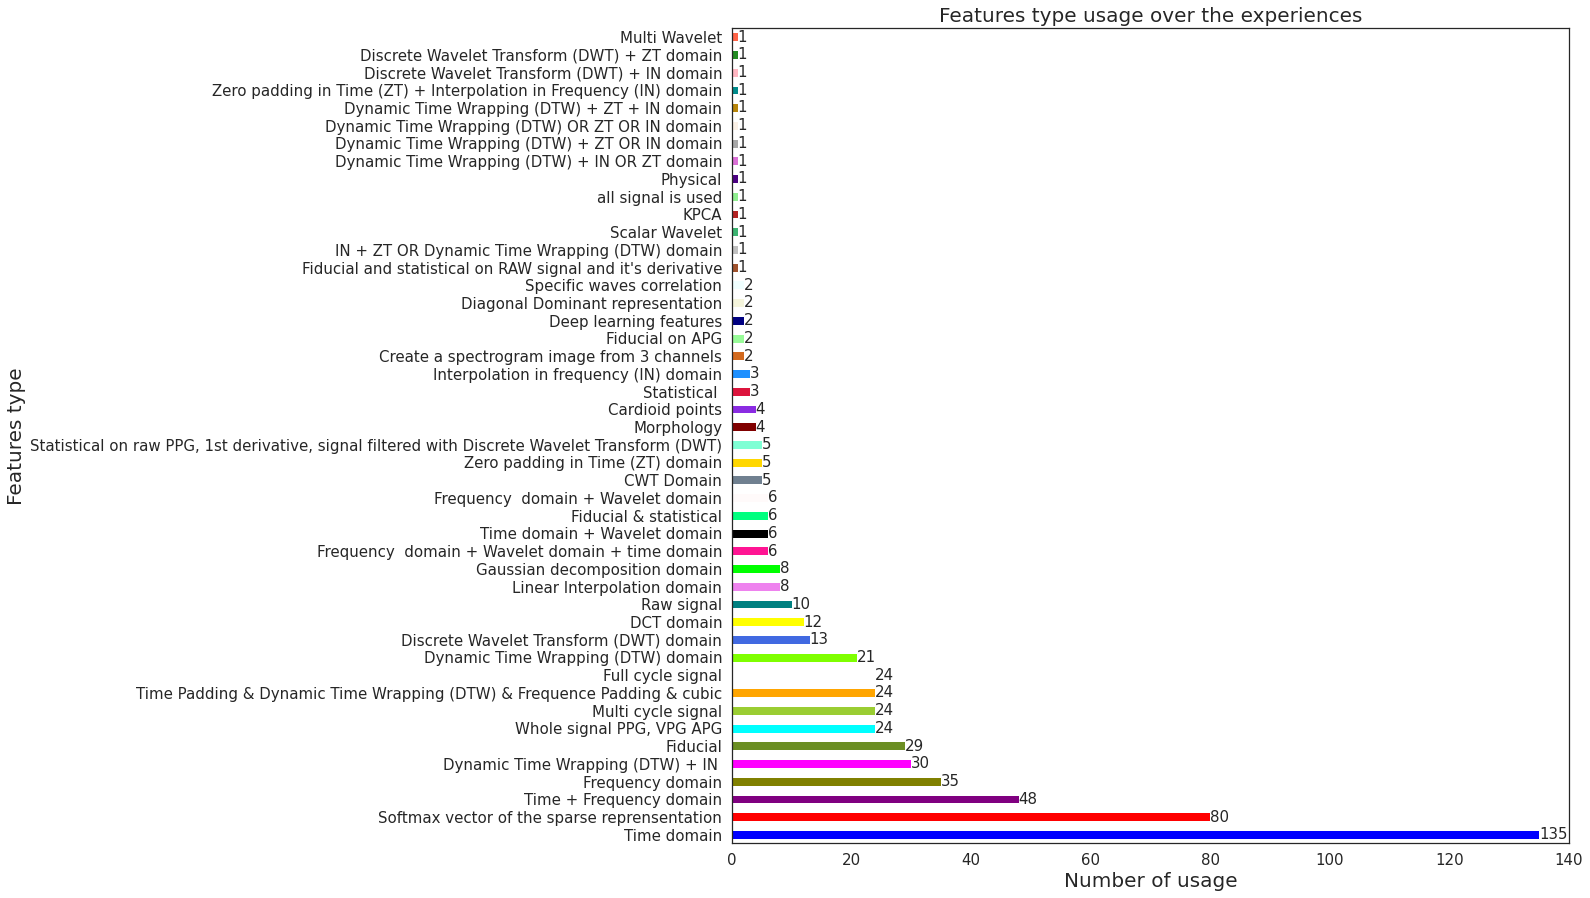

In [406]:
fig = plt.figure(figsize=(15, 15))
ax = exp_df['Features type'].value_counts().plot.barh(fontsize=15, color=color_map_filter_pink)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 140])
ax.set_ylabel("Features type",fontsize=20)
ax.set_xlabel("Number of usage",fontsize=20)
ax.set_title("Features type usage over the experiences",fontsize=20)

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

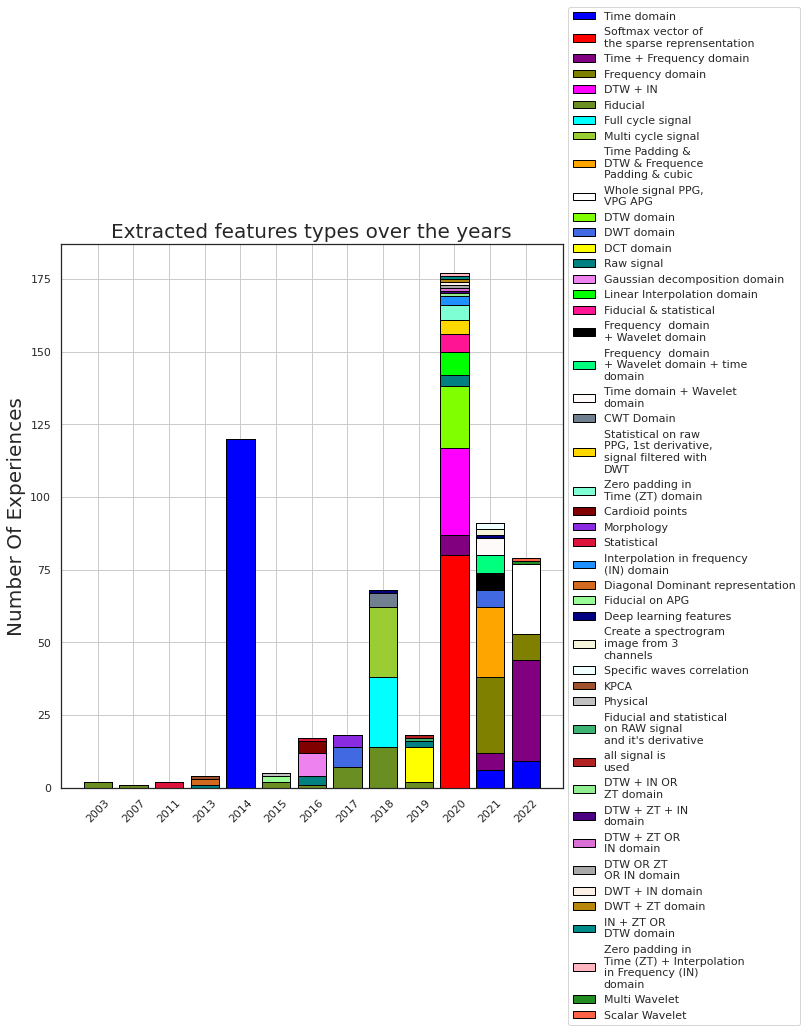

In [407]:
plot_hist_hue(freq_df=feature_type_by_exp,col_name="Features type",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Extracted features types over the years",color_map=color_map_filter_pink)

The feature extraction is a key step to build an efficient biometric recognition system. Thus most of the papers provide details about this stage : type of features, number of features, extraction or selection methods. We only have 0.16% of missing values for the feature types. In general we observe the usage of fiducial, time domain or transformed domain feature types . The fiducial domain correspond to historicals landmarks on the signal, taken from biology (like systolic peak). The time domain features correspond to statistics about the signal in time domain like min, max, kurtosis, skewness etc. Then the transformed domain correspond to all features extrated with a signal transformation like FFT, DWT, DCT etc. 
We observe in our dataset, 46 differents methods over 46 different papers. Some features types were used by differents papers, like the time domain, fiducial or statistical types. Other papers as hwang2020evaluation compare the efficiency of multiples type of features extraction like Interpolation in frequency, Zero Padding in Time, Dynamique Time Wrapping and all the possible combination of this features types. 
Moreover, some feature types were extracted on multiple version of the signal : raw signal, first and second derivative. 

## Feature extraction or selection methods

In this section we focuse on the selection or extraction methods of the features. Once the features types is decided, it is interesting to reduce the dimensionality by selecting the most important features. This improve the algorithm performances.

   paper_year Feature extraction or selection methods  Frequency
0        2003                                    None          1
1        2003               all features are selected          1
2        2007               all features are selected          1
3        2011                                     LDA          2
4        2013                             16 signals           1
..        ...                                     ...        ...
76       2022                                    MSDF          3
77       2022                                    STFT          3
78       2022                                fiducial          3
79       2022               Wavelet decomposition GHM          1
80       2022               Wevelet decomposition db4          1

[81 rows x 3 columns]
594
percentage of missing values : 1.4925373134328357%


Text(0.5, 1.0, 'Feature extraction or selection methods usage over the experiences')

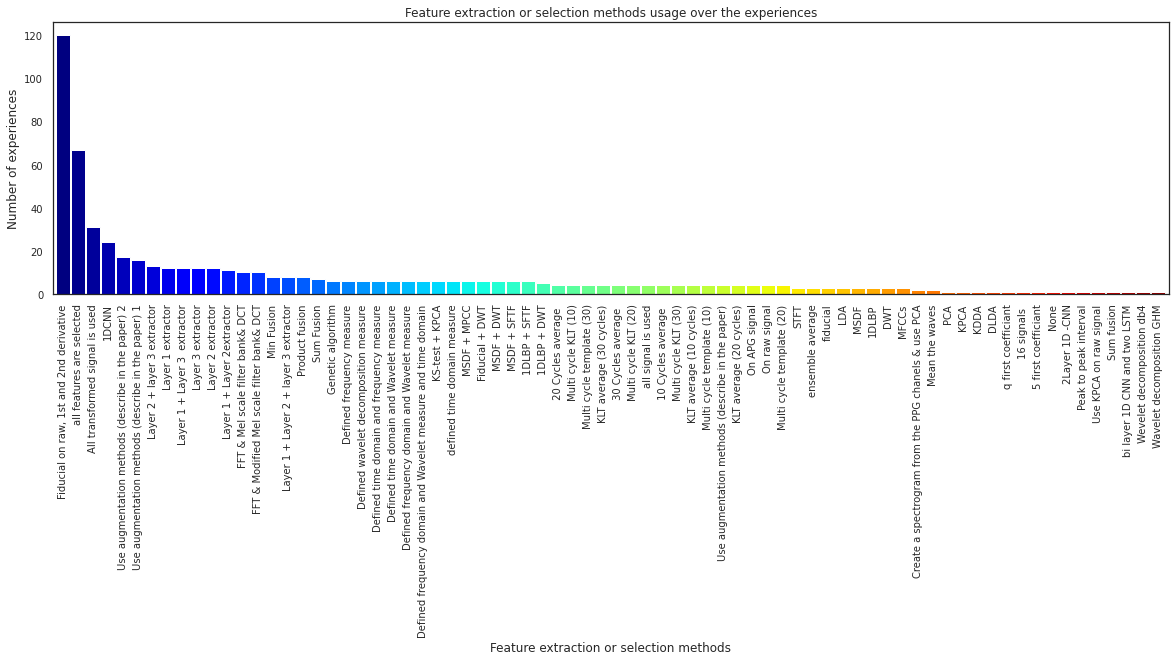

In [408]:
feature_selection_by_exp=goup_by_year_df['Feature extraction or selection methods'].value_counts().reset_index(name='Frequency')
print(feature_selection_by_exp)
print(exp_df['Feature extraction or selection methods'].count())
percent_missing=((total_exp-exp_df['Feature extraction or selection methods'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Feature extraction or selection methods'].unique())
color = cm.jet(np.linspace(0, 1, col_len))


fig = plt.figure(figsize=(20, 5))

ax=exp_df['Feature extraction or selection methods'].value_counts().plot.bar(color=color,fontsize=10,width=0.9,edgecolor='white', linewidth=1)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Feature extraction or selection methods")
ax.set_title("Feature extraction or selection methods usage over the experiences")


Text(0.5, 1.0, 'Feature extraction or selection methods usage in proportion over the experiences')

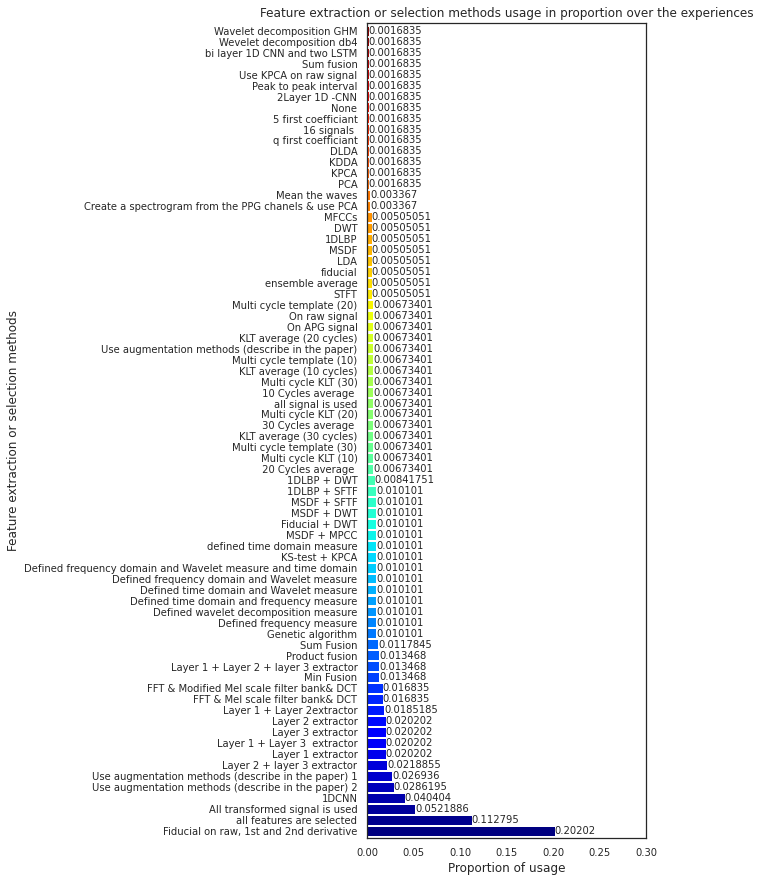

In [409]:
fig = plt.figure(figsize=(5, 15))
ax = exp_df['Feature extraction or selection methods'].value_counts(normalize=True).plot.barh(fontsize=10, color=color,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlim([0, 0.30])
ax.plot(figsize=(8,8))
ax.set_ylabel("Feature extraction or selection methods")
ax.set_xlabel("Proportion of usage")
ax.set_title("Feature extraction or selection methods usage in proportion over the experiences")

Text(0.5, 1.0, 'Feature extraction or selection methods usage over the experiences')

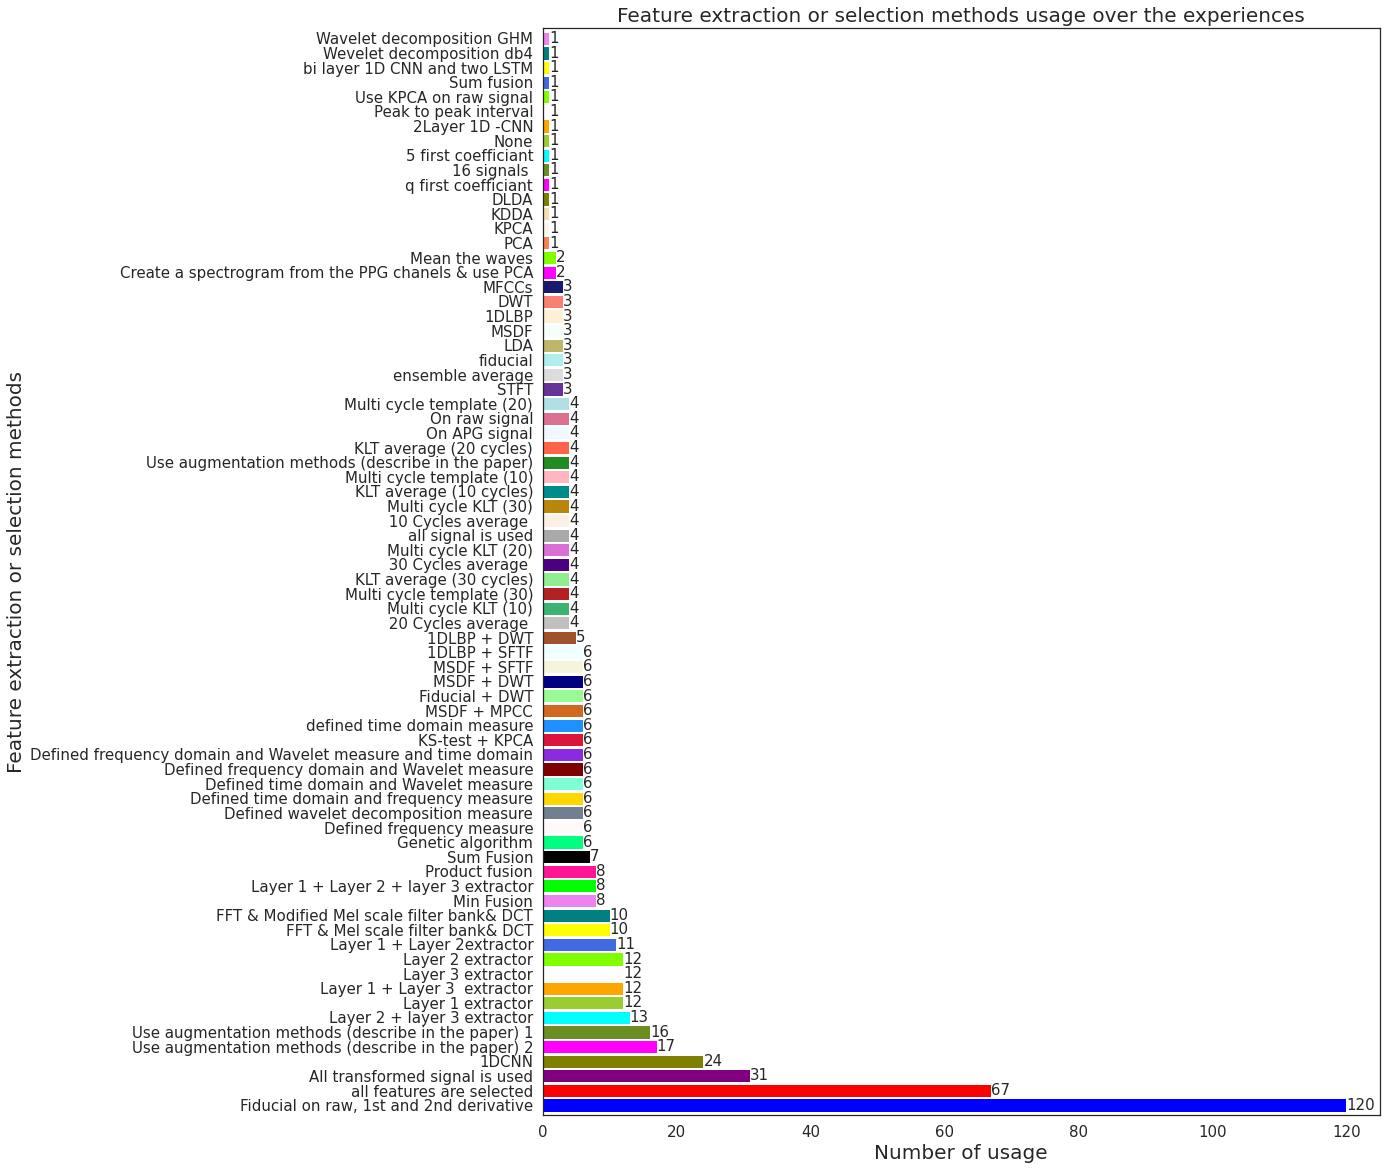

In [410]:
fig = plt.figure(figsize=(15, 20))
ax = exp_df['Feature extraction or selection methods'].value_counts().plot.barh(fontsize=15, color=color_map_filter_pink,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 125])
ax.set_ylabel("Feature extraction or selection methods",fontsize=20)
ax.set_xlabel("Number of usage",fontsize=20)
ax.set_title("Feature extraction or selection methods usage over the experiences",fontsize=20)

nb col = 2


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1368x1800 with 0 Axes>

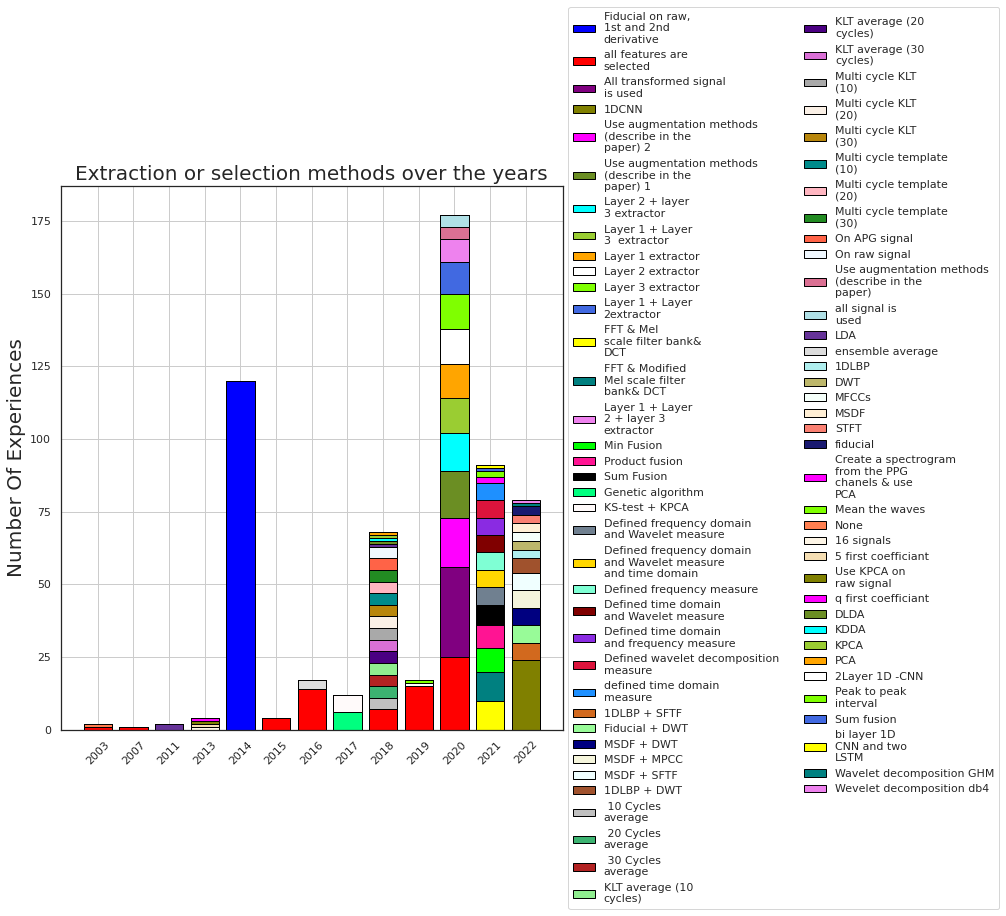

In [411]:
plot_hist_hue(freq_df=feature_selection_by_exp,col_name="Feature extraction or selection methods",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Extraction or selection methods over the years",color_map=color_map_filter_pink)

TODO : INTERPRET

## Algorithm type

percentage of missing values : 0.0%


Text(0.5, 1.0, 'Algorithm type usage over the experiences')

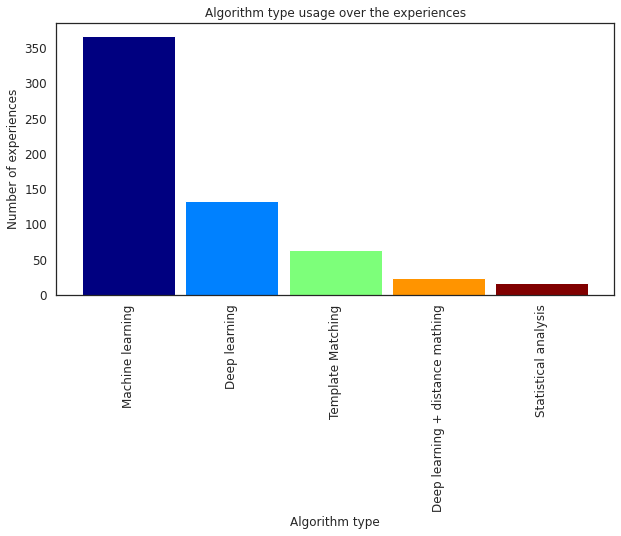

In [412]:
algo_type_by_exp=goup_by_year_df['Algorithm type'].value_counts().reset_index(name='Frequency')
#print(algo_type_by_exp)
#print(exp_df['Algorithm type'].count())
percent_missing=((total_exp-exp_df['Algorithm type'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Algorithm type'].unique())
color = cm.jet(np.linspace(0, 1, col_len))


fig = plt.figure(figsize=(10, 5))

ax=exp_df['Algorithm type'].value_counts().plot.bar(color=color,fontsize=12,width=0.9,edgecolor='white', linewidth=1)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Algorithm type")
ax.set_title("Algorithm type usage over the experiences")

Text(0.5, 1.0, 'Algorithm type usage in proportion over the experiences')

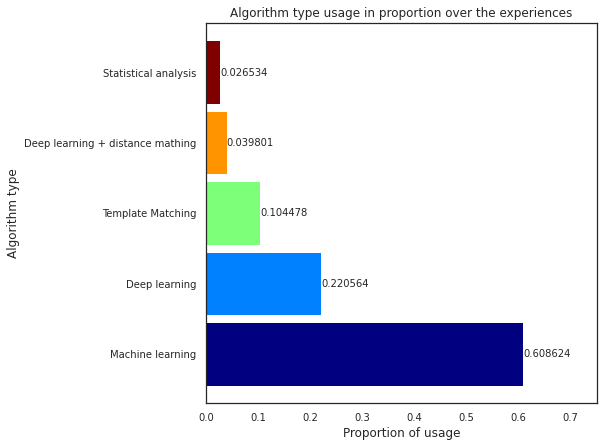

In [413]:
fig = plt.figure(figsize=(7, 7))
ax = exp_df['Algorithm type'].value_counts(normalize=True).plot.barh(fontsize=10, color=color,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlim([0, 0.75])
ax.plot(figsize=(8,8))
ax.set_ylabel("Algorithm type")
ax.set_xlabel("Proportion of usage")
ax.set_title("Algorithm type usage in proportion over the experiences")


Text(0.5, 1.0, 'Algorithm type usage over the experiences')

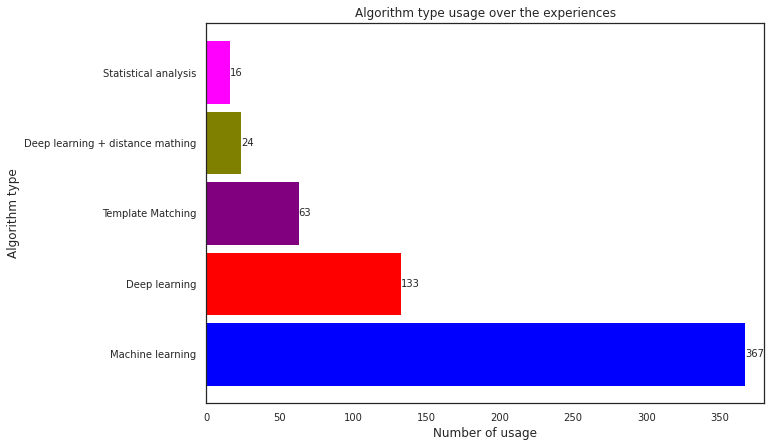

In [414]:
fig = plt.figure(figsize=(10, 7))
ax = exp_df['Algorithm type'].value_counts().plot.barh(fontsize=10, color=color_map_filter_pink,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlim([0, 380])
ax.set_ylabel("Algorithm type")
ax.set_xlabel("Number of usage")
ax.set_title("Algorithm type usage over the experiences")

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

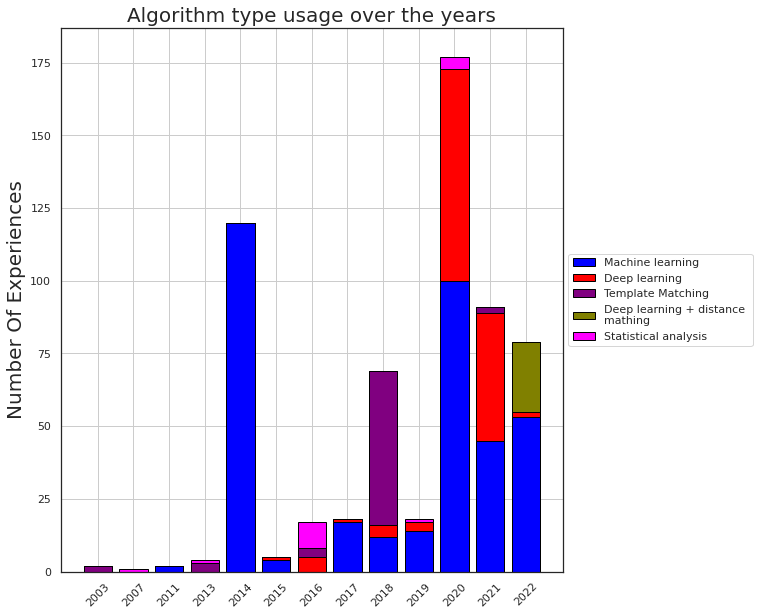

In [415]:
plot_hist_hue(freq_df=algo_type_by_exp,col_name="Algorithm type",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Algorithm type usage over the years",color_map=color_map_filter_pink)

## Architecture

percentage of missing values : 0.8291873963515755%


Text(0.5, 1.0, 'Architecture usage over the experiences')

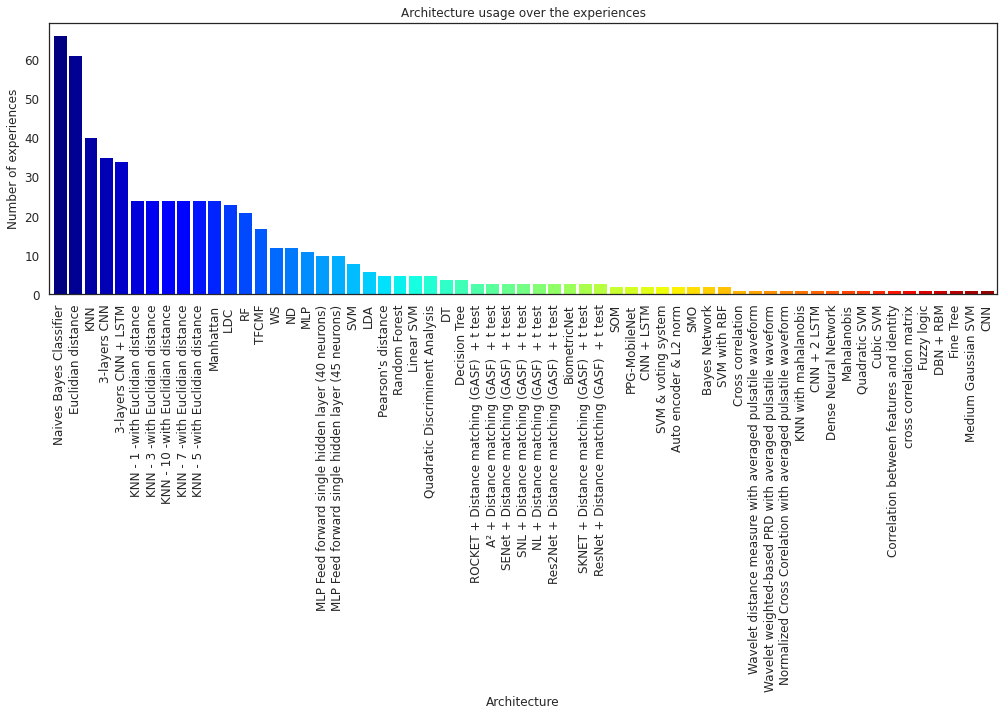

In [416]:
archi_type_by_exp=goup_by_year_df['Architecture'].value_counts().reset_index(name='Frequency')
#print(archi_type_by_exp)
#print(exp_df['Architecture'].count())
percent_missing=((total_exp-exp_df['Architecture'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Architecture'].unique())
color = cm.jet(np.linspace(0, 1, col_len))


fig = plt.figure(figsize=(17, 5))

ax=exp_df['Architecture'].value_counts().plot.bar(color=color,fontsize=12,width=0.9,edgecolor='white', linewidth=1)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Architecture")
ax.set_title("Architecture usage over the experiences")

Text(0.5, 1.0, 'Architecture usage in proportion over the experiences')

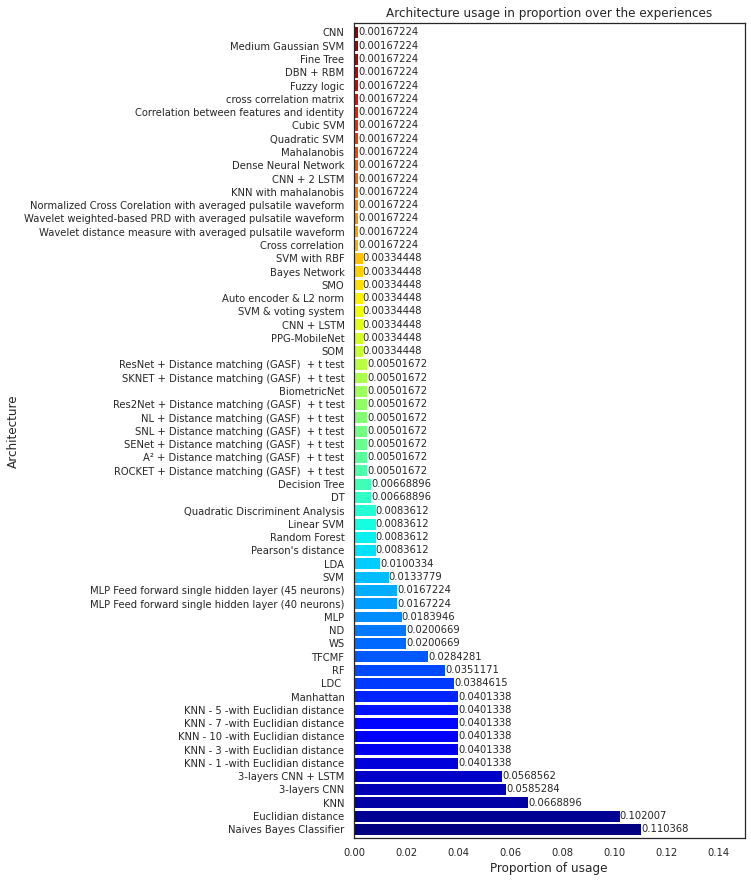

In [417]:
fig = plt.figure(figsize=(7, 15))
ax = exp_df['Architecture'].value_counts(normalize=True).plot.barh(fontsize=10, color=color,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlim([0, 0.15])
ax.set_ylabel("Architecture")
ax.set_xlabel("Proportion of usage")
ax.set_title("Architecture usage in proportion over the experiences")


KNN Variation                                                   161
Naives Bayes Classifier                                          66
Euclidian distance                                               61
3-layers CNN                                                     35
3-layers CNN + LSTM                                              34
Manhattan                                                        24
LDC                                                              23
RF                                                               21
SVM Variation                                                    20
TFCMF                                                            17
ND                                                               12
WS                                                               12
MLP                                                              11
MLP Feed forward single hidden layer (40 neurons)                10
MLP Feed forward single hidden layer (45 neurons

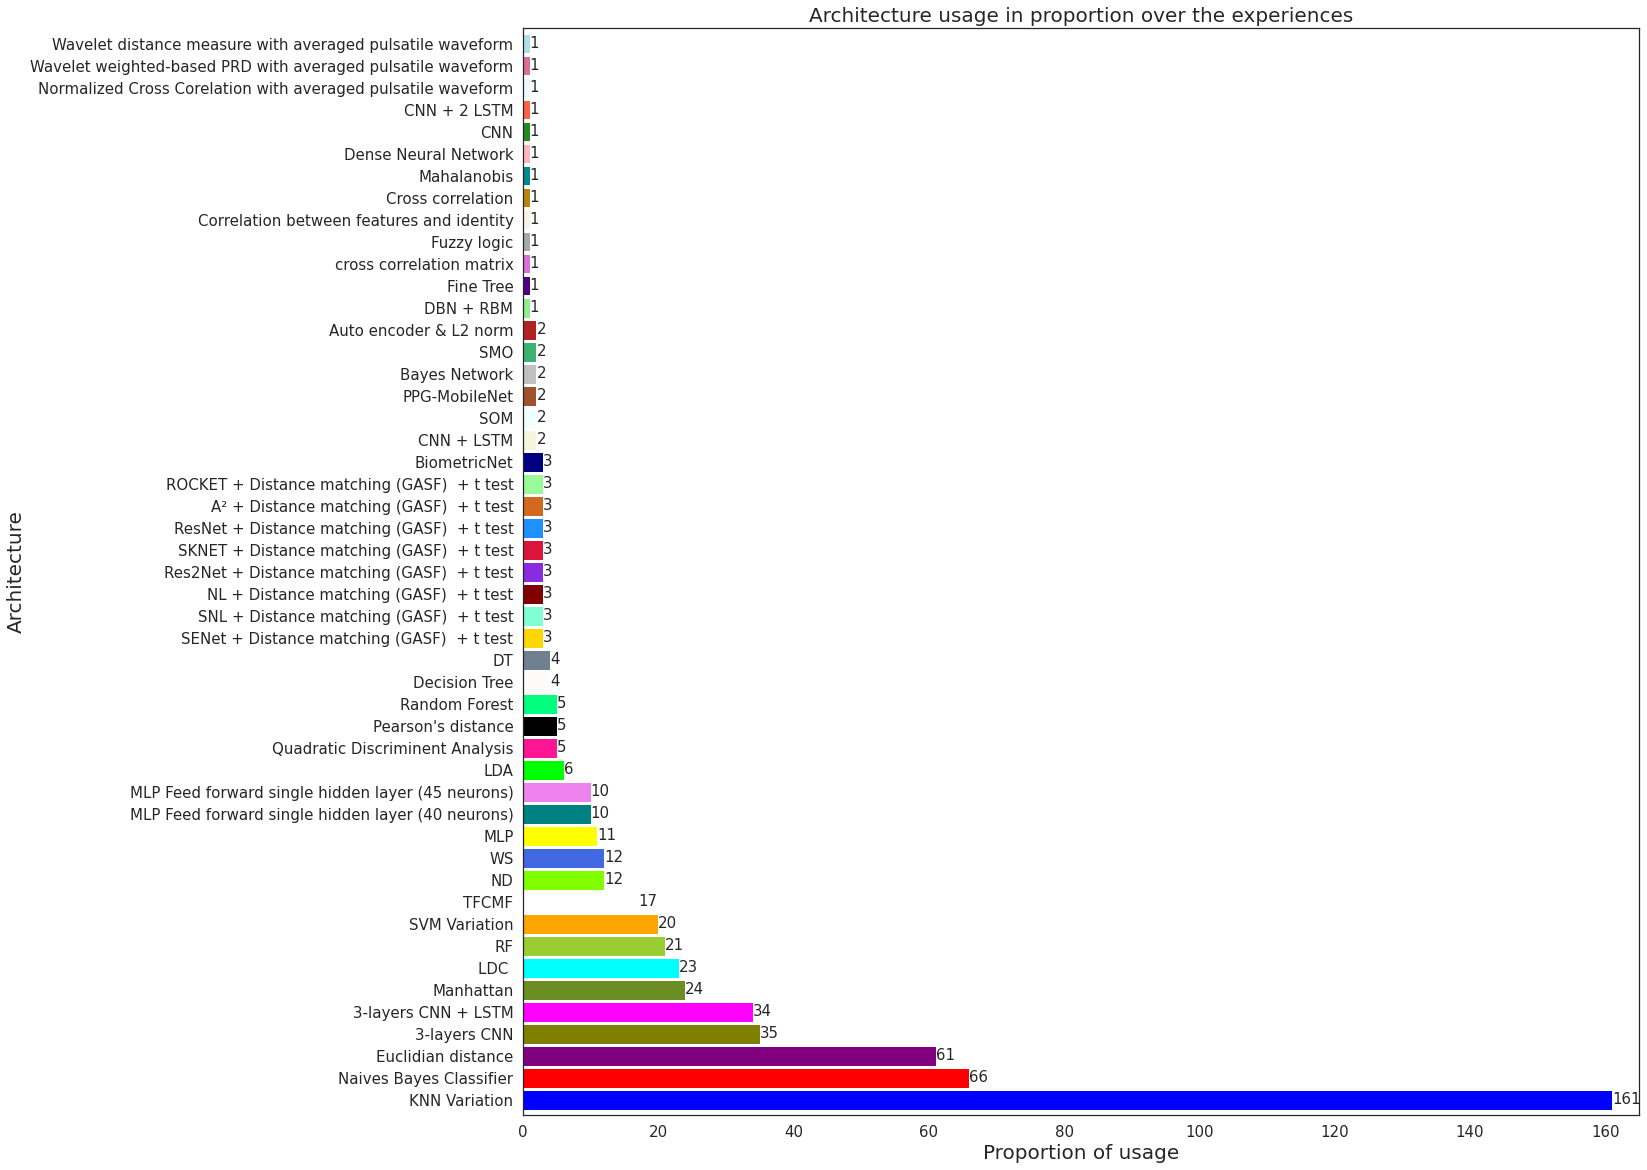

In [418]:
exp_df['Architecture'] = exp_df['Architecture'].replace('^KNN.*', 'KNN Variation', regex=True)
exp_df['Architecture'] = exp_df['Architecture'].replace('.*SVM.*', 'SVM Variation', regex=True)


print(exp_df['Architecture'].value_counts())
fig = plt.figure(figsize=(20, 20))
ax = exp_df['Architecture'].value_counts().plot.barh(fontsize=15, color=color_map_filter_pink,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 165])
ax.set_ylabel("Architecture",fontsize=20)
ax.set_xlabel("Proportion of usage",fontsize=20)
ax.set_title("Architecture usage in proportion over the experiences",fontsize=20)
fig.savefig("archi_usage_prop.svg", format='svg', dpi=1200)

nb col = 2


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1368x1800 with 0 Axes>

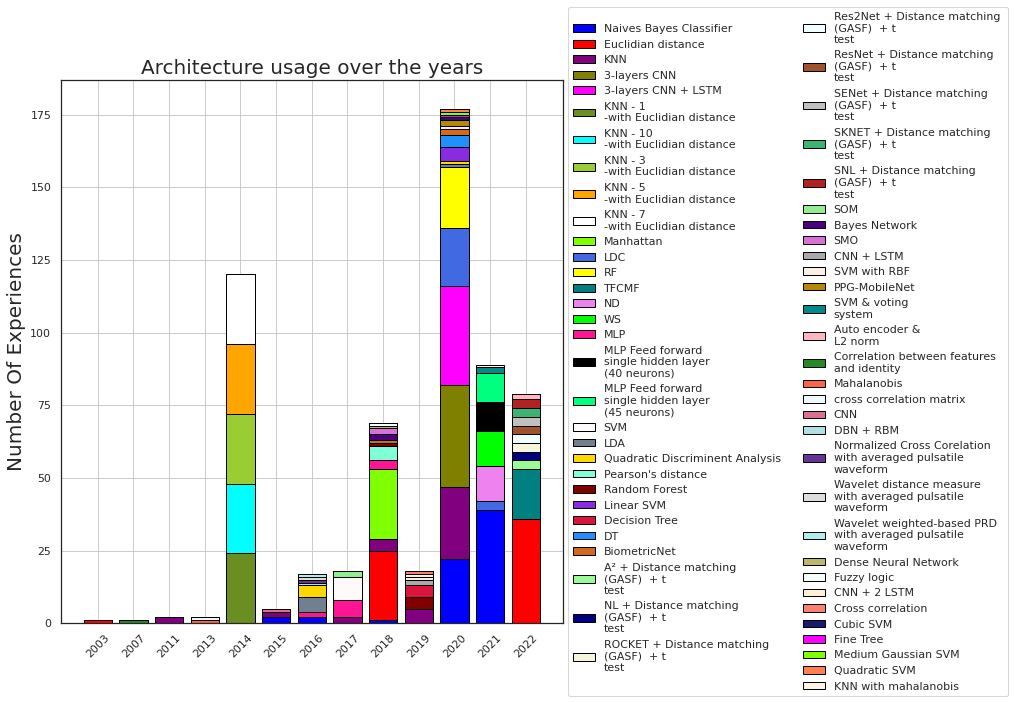

In [419]:
plot_hist_hue(freq_df=archi_type_by_exp,col_name="Architecture",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Architecture usage over the years",color_map=color_map_filter_pink)



## Training dataset 

percentage of missing values : 12.769485903814262%


Text(0.5, 1.0, 'Training dataset usage over the experiences')

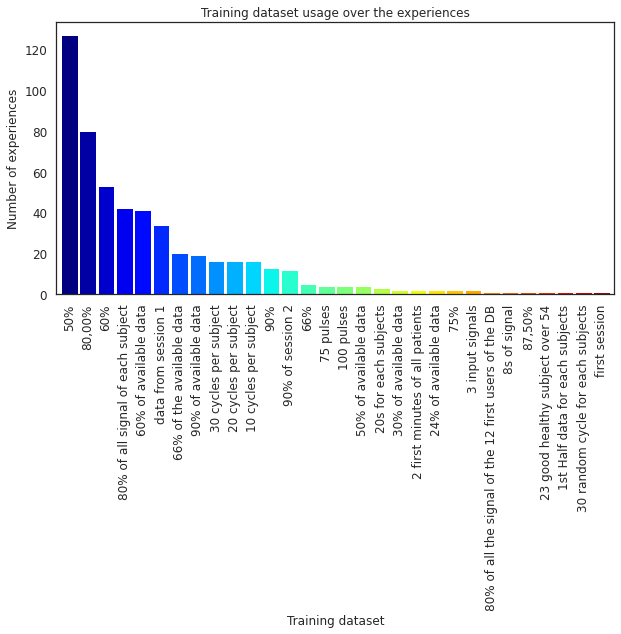

In [420]:

training_dataset_by_exp=goup_by_year_df['Training dataset'].value_counts().reset_index(name='Frequency')
#print(archi_type_by_exp)
#print(exp_df['Training dataset'].count())
percent_missing=((total_exp-exp_df['Training dataset'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")
col_len=len(exp_df['Training dataset'].unique())
color = cm.jet(np.linspace(0, 1, col_len))


fig = plt.figure(figsize=(10, 5))

ax=exp_df['Training dataset'].value_counts().plot.bar(color=color,fontsize=12,width=0.9,edgecolor='white', linewidth=1)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Training dataset")
ax.set_title("Training dataset usage over the experiences")



Text(0.5, 1.0, 'Training dataset usage in proportion over the experiences')

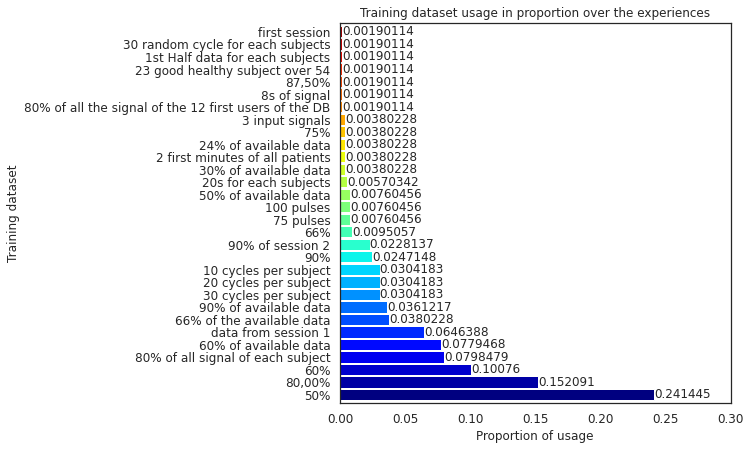

In [421]:
fig = plt.figure(figsize=(7, 7))
ax = exp_df['Training dataset'].value_counts(normalize=True).plot.barh(fontsize=12, color=color,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=12)
ax.set_xlim([0, 0.30])
ax.set_ylabel("Training dataset")
ax.set_xlabel("Proportion of usage")
ax.set_title("Training dataset usage in proportion over the experiences")

Text(0.5, 1.0, 'Training dataset usage over the experiences')

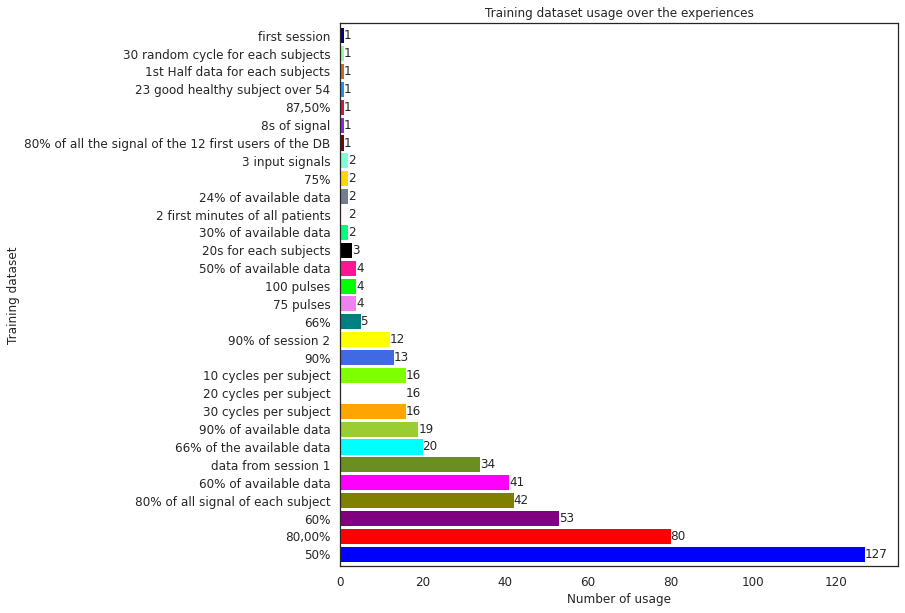

In [422]:
fig = plt.figure(figsize=(10, 10))
ax = exp_df['Training dataset'].value_counts().plot.barh(fontsize=12, color=color_map_filter_pink,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=12)
ax.set_xlim([0, 135])
ax.set_ylabel("Training dataset")
ax.set_xlabel("Number of usage")
ax.set_title("Training dataset usage over the experiences")

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

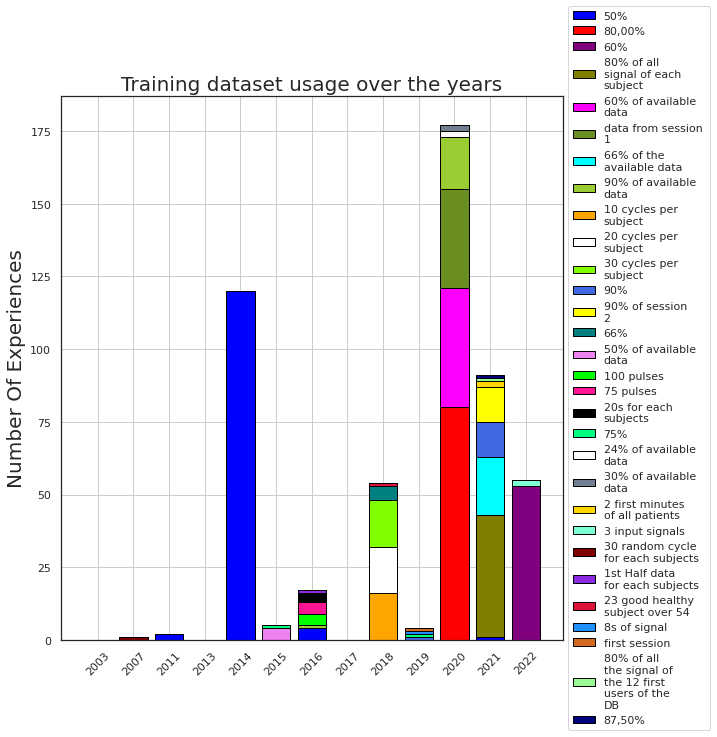

In [423]:
plot_hist_hue(freq_df=training_dataset_by_exp,col_name="Training dataset",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Training dataset usage over the years",color_map=color_map_filter_pink)

## Evaluation dataset

   paper_year                                 Architecture  Frequency
0        2003                           Euclidian distance          1
1        2007    Correlation between features and identity          1
2        2011                                          KNN          2
3        2013                                  Mahalanobis          1
4        2013                     cross correlation matrix          1
..        ...                                          ...        ...
75       2022  ResNet + Distance matching (GASF)  + t test          3
76       2022   SENet + Distance matching (GASF)  + t test          3
77       2022   SKNET + Distance matching (GASF)  + t test          3
78       2022     SNL + Distance matching (GASF)  + t test          3
79       2022                       Auto encoder & L2 norm          2

[80 rows x 3 columns]
516
percentage of missing values : 14.427860696517413%


Text(0.5, 1.0, 'Evaluation dataset usage over the experiences')

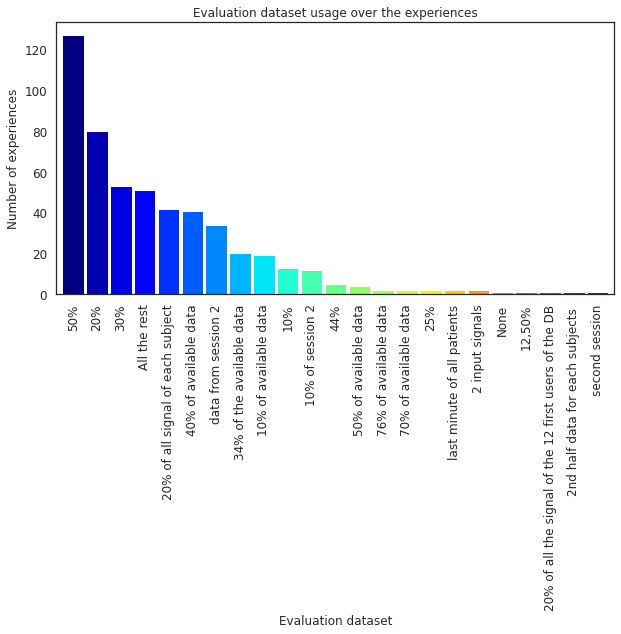

In [312]:
evaluation_dataset_by_exp=goup_by_year_df['Evaluation dataset'].value_counts().reset_index(name='Frequency')
print(archi_type_by_exp)
print(exp_df['Evaluation dataset'].count())
percent_missing=((total_exp-exp_df['Evaluation dataset'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Evaluation dataset'].unique())
color = cm.jet(np.linspace(0, 1, col_len))


fig = plt.figure(figsize=(10, 5))

ax=exp_df['Evaluation dataset'].value_counts().plot.bar(color=color,fontsize=12,width=0.9,edgecolor='white', linewidth=1)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Evaluation dataset")
ax.set_title("Evaluation dataset usage over the experiences")


Text(0.5, 1.0, 'Evaluation dataset usage in proportion over the experiences')

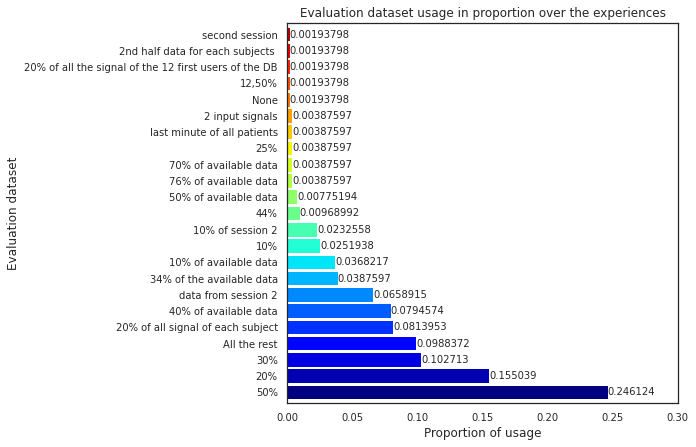

In [313]:
fig = plt.figure(figsize=(7, 7))
ax = exp_df['Evaluation dataset'].value_counts(normalize=True).plot.barh(fontsize=10, color=color,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlim([0, 0.3])
ax.set_ylabel("Evaluation dataset")
ax.set_xlabel("Proportion of usage")
ax.set_title("Evaluation dataset usage in proportion over the experiences")

Text(0.5, 1.0, 'Evaluation dataset usage over the experiences')

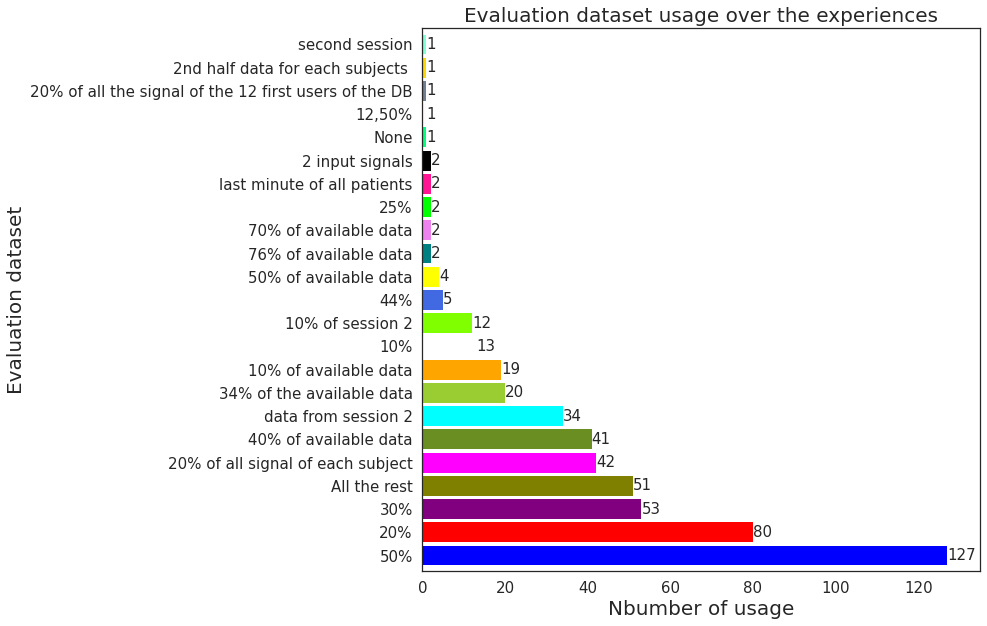

In [314]:
fig = plt.figure(figsize=(10, 10))
ax = exp_df['Evaluation dataset'].value_counts().plot.barh(fontsize=15, color=color_map_filter_pink,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 135])
ax.set_ylabel("Evaluation dataset",fontsize=20)
ax.set_xlabel("Nbumber of usage",fontsize=20)
ax.set_title("Evaluation dataset usage over the experiences",fontsize=20)

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

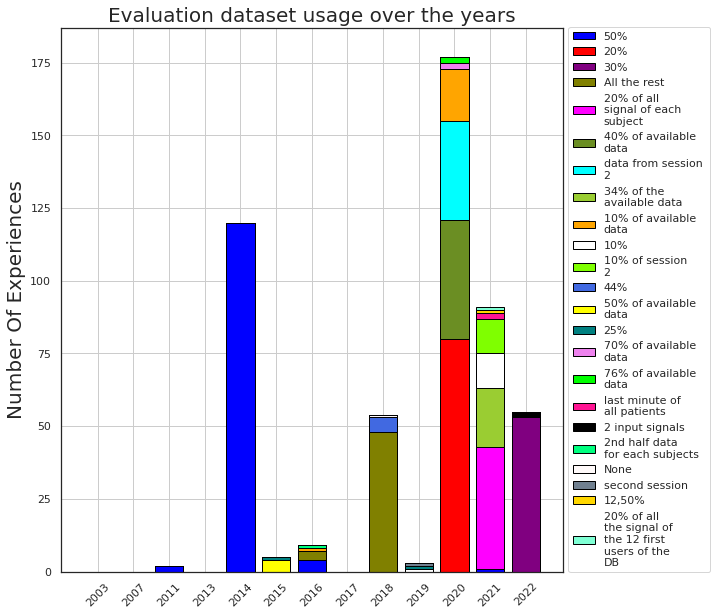

In [315]:
plot_hist_hue(freq_df=evaluation_dataset_by_exp,col_name="Evaluation dataset",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Evaluation dataset usage over the years",color_map=color_map_filter_pink)

## Validation method

   paper_year                                 Architecture  Frequency
0        2003                           Euclidian distance          1
1        2007    Correlation between features and identity          1
2        2011                                          KNN          2
3        2013                                  Mahalanobis          1
4        2013                     cross correlation matrix          1
..        ...                                          ...        ...
75       2022  ResNet + Distance matching (GASF)  + t test          3
76       2022   SENet + Distance matching (GASF)  + t test          3
77       2022   SKNET + Distance matching (GASF)  + t test          3
78       2022     SNL + Distance matching (GASF)  + t test          3
79       2022                       Auto encoder & L2 norm          2

[80 rows x 3 columns]
128
percentage of missing values : 78.77280265339967%


Text(0.5, 1.0, 'Validation method usage over the experiences')

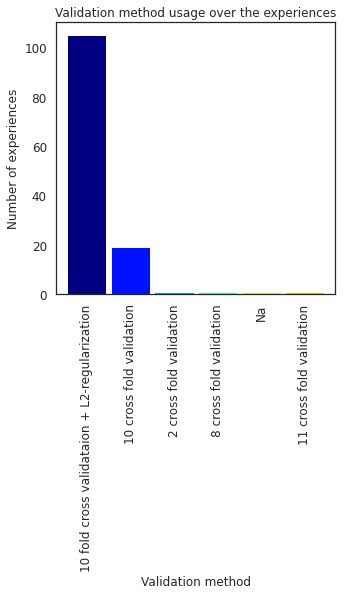

In [316]:
validation_method_by_exp=goup_by_year_df['Validation method'].value_counts().reset_index(name='Frequency')
print(archi_type_by_exp)
print(exp_df['Validation method'].count())
percent_missing=((total_exp-exp_df['Validation method'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Validation method'].unique())
color = cm.jet(np.linspace(0, 1, col_len))


fig = plt.figure(figsize=(5, 5))

ax=exp_df['Validation method'].value_counts().plot.bar(color=color,fontsize=12,width=0.9,edgecolor='white', linewidth=1)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Validation method")
ax.set_title("Validation method usage over the experiences")


Text(0.5, 1.0, 'Validation method usage in proportion over the experiences')

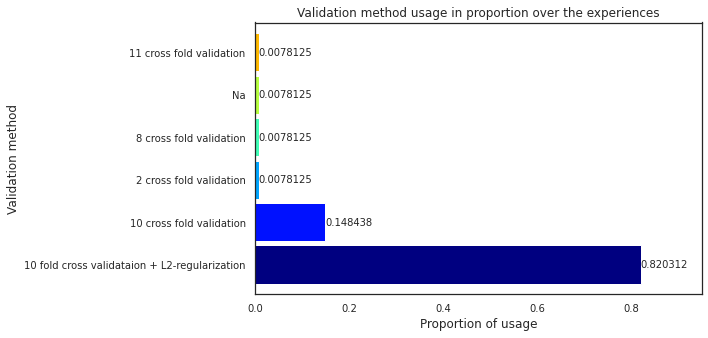

In [317]:
fig = plt.figure(figsize=(8, 5))
ax = exp_df['Validation method'].value_counts(normalize=True).plot.barh(fontsize=10, color=color,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlim([0, 0.95])
ax.set_ylabel("Validation method")
ax.set_xlabel("Proportion of usage")
ax.set_title("Validation method usage in proportion over the experiences")

Text(0.5, 1.0, 'Validation method usage over the experiences')

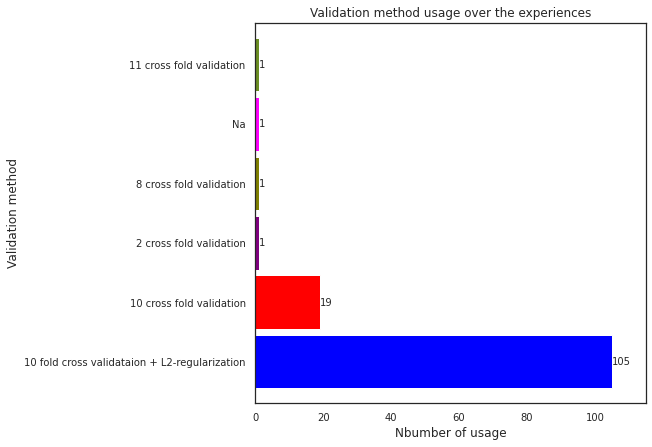

In [318]:
fig = plt.figure(figsize=(7, 7))
ax = exp_df['Validation method'].value_counts().plot.barh(fontsize=10, color=color_map_filter_pink,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=10)
ax.set_xlim([0, 115])
ax.set_ylabel("Validation method")
ax.set_xlabel("Nbumber of usage")
ax.set_title("Validation method usage over the experiences")

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

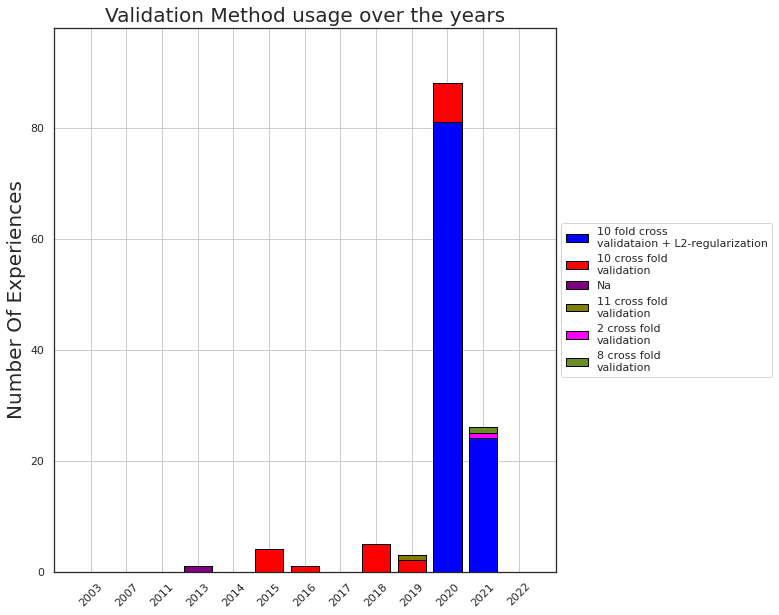

In [319]:
plot_hist_hue(freq_df=validation_method_by_exp,col_name="Validation method",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Validation Method usage over the years",color_map=color_map_filter_pink)

## Statistics about numerical values

   paper_year         Feature length  Frequency
0        2003                      4          2
1        2011                     14          1
2        2011                     15          1
3        2013                      5          1
4        2013                     Na          1
..        ...                    ...        ...
59       2021                     10          2
60       2021                     32          1
61       2022                   1500         24
62       2022                     17          3
63       2022  1024-dimension vector          2

[64 rows x 3 columns]
422
percentage of missing values : 30.016583747927033%


Text(0.5, 1.0, 'Feature length usage over the experiences')

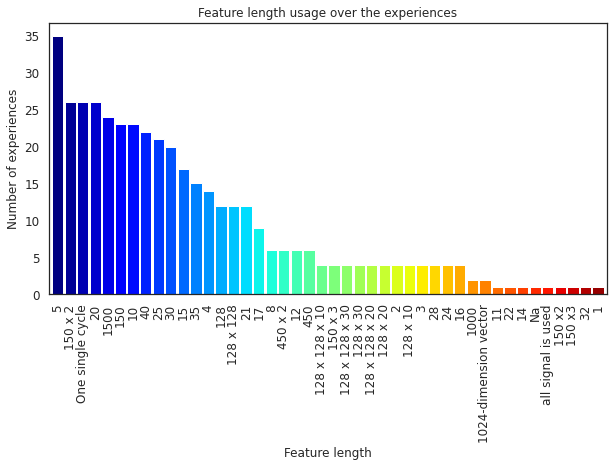

In [320]:
feature_length_by_exp=goup_by_year_df['Feature length'].value_counts().reset_index(name='Frequency')
print(feature_length_by_exp)
print(exp_df['Feature length'].count())
percent_missing=((total_exp-exp_df['Feature length'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(exp_df['Feature length'].unique())
color = cm.jet(np.linspace(0, 1, col_len))


fig = plt.figure(figsize=(10, 5))

ax=exp_df['Feature length'].value_counts().plot.bar(color=color,fontsize=12,width=0.9,edgecolor='white', linewidth=1)
ax.set_ylabel("Number of experiences")
ax.set_xlabel("Feature length")
ax.set_title("Feature length usage over the experiences")


Text(0.5, 1.0, 'Feature length usage in proportion over the experiences')

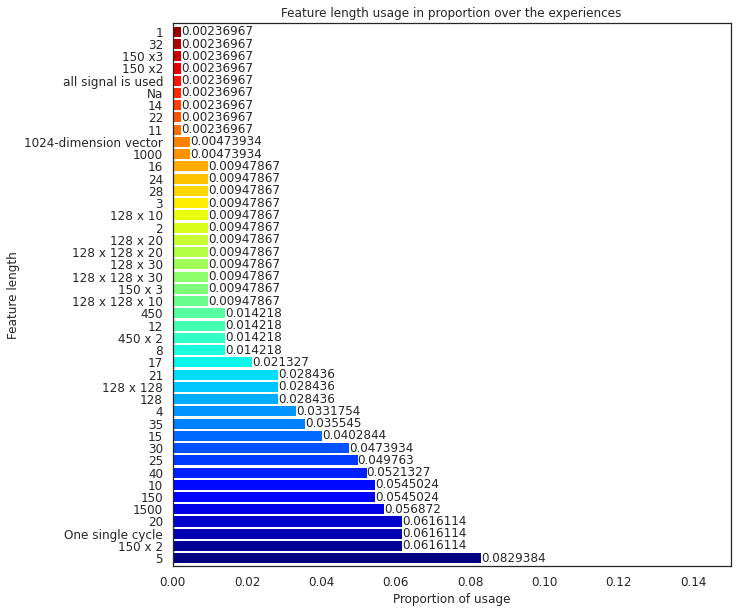

In [321]:
fig = plt.figure(figsize=(10, 10))
ax = exp_df['Feature length'].value_counts(normalize=True).plot.barh(fontsize=12, color=color,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=12)
ax.set_xlim([0, 0.15])
ax.set_ylabel("Feature length")
ax.set_xlabel("Proportion of usage")
ax.set_title("Feature length usage in proportion over the experiences")

Text(0.5, 1.0, 'Feature length usage over the experiences')

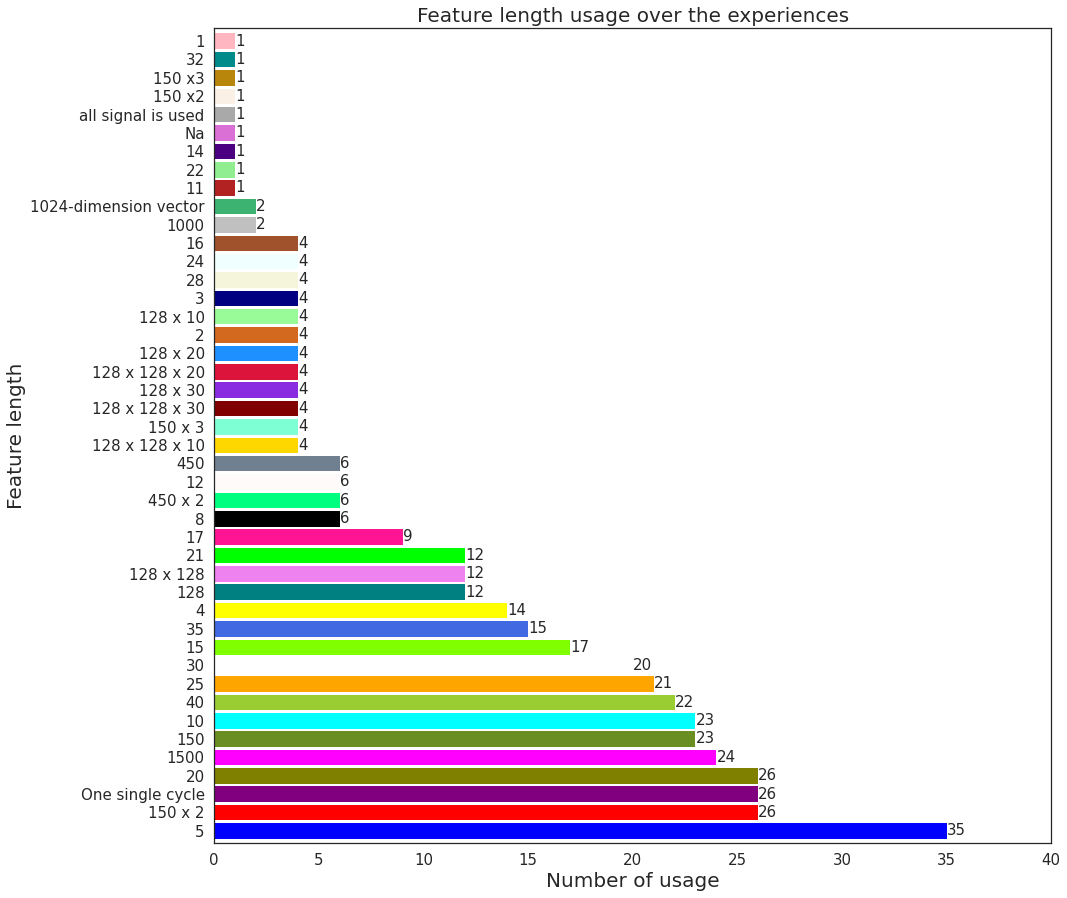

In [322]:
fig = plt.figure(figsize=(15, 15))
ax = exp_df['Feature length'].value_counts().plot.barh(fontsize=15, color=color_map_filter_pink,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 40])
ax.set_ylabel("Feature length",fontsize=20)
ax.set_xlabel("Number of usage",fontsize=20)
ax.set_title("Feature length usage over the experiences",fontsize=20)

nb col = 1


/tmp/ipykernel_296/1364773613.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


<Figure size 1224x1800 with 0 Axes>

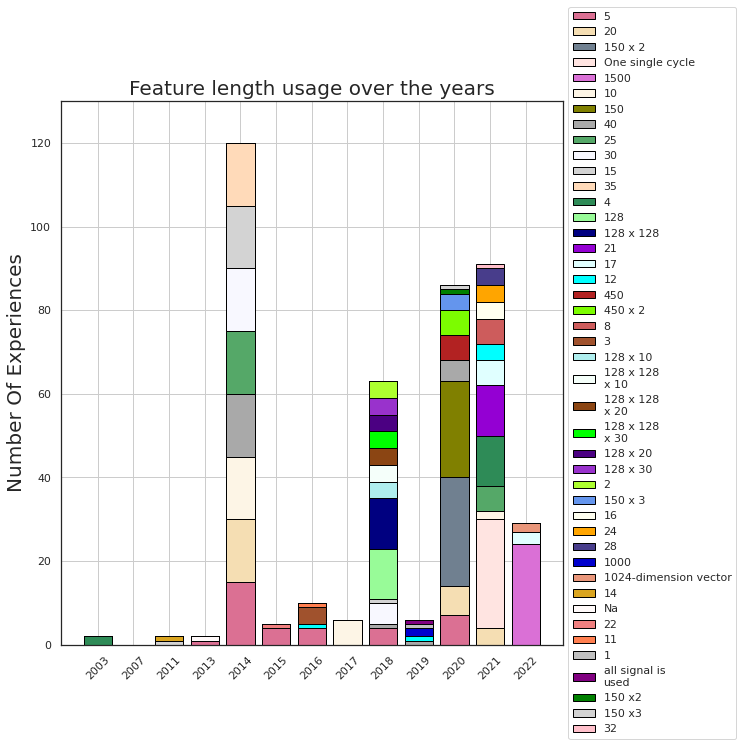

In [323]:
plot_hist_hue(freq_df=feature_length_by_exp,col_name="Feature length",
    x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Feature length usage over the years",color_map=color_map)

### Length in one dimension

We can observe a big hetereogenity of the feature length. Multiple papers use all the available signal or full cycle. However the real number of feature will depends on the sampling frequency, thus leading to a different number of feature for each paper.
Moreover some papers test multiples features length, for example to find the best combinaisons of extracted features. 
Some papers use 1D features vectors whiles other uses 2D or 3D. 

To have an idea of the evolution of the number of feature used, we will replace the 2D and 3D vector by the length of total number they are containing. Plus, we will drop the feature length based on a full cycle or a full signal because we do not have the numerical equivalent.

In [324]:
exp_df.loc[exp_df['Feature length'] == '128 x 128', 'Feature length'] = 16634
exp_df.loc[exp_df['Feature length'] == '128 x 10', 'Feature length'] = 1280
exp_df.loc[exp_df['Feature length'] == '128 x 128 x 10', 'Feature length'] = 166340
exp_df.loc[exp_df['Feature length'] == '128 x 128 x 20', 'Feature length'] = 327680
exp_df.loc[exp_df['Feature length'] == '128 x 128 x 30', 'Feature length'] = 491520
exp_df.loc[exp_df['Feature length'] == '128 x 20', 'Feature length'] = 2560
exp_df.loc[exp_df['Feature length'] == '128 x 30', 'Feature length'] = 3840
exp_df.loc[exp_df['Feature length'] == '150 x 2', 'Feature length'] = 300
exp_df.loc[exp_df['Feature length'] == '150 x2', 'Feature length'] = 300
exp_df.loc[exp_df['Feature length'] == '150 x 3', 'Feature length'] = 450
exp_df.loc[exp_df['Feature length'] == '150 x3', 'Feature length'] = 450
exp_df.loc[exp_df['Feature length'] == '450 x 2', 'Feature length'] = 900
exp_df.loc[exp_df['Feature length'] == '1024-dimension vector', 'Feature length'] = 1024


exp_df.loc[exp_df['Feature length'] == 'all signal is used', 'Feature length'] = None
exp_df.loc[exp_df['Feature length'] == 'One single cycle', 'Feature length'] = None
exp_df.loc[exp_df['Feature length'] == 'Na', 'Feature length'] = None
##exp_df.loc[exp_df['Feature length'] == 'full cycle', 'Feature length'] = None

exp_df['Feature length']=exp_df['Feature length'].astype('float')

goup_by_year_df=exp_df.groupby('paper_year')
feature_length_by_exp=goup_by_year_df['Feature length'].value_counts().reset_index(name='Frequency')

# plot_hist_hue(freq_df=feature_length_by_exp,col_name="Feature length",
#     x_labels=labels,x_title="years",y_title="Number Of Experiences",title="Feature length usage over the years after 1D transform",color_map=color_map_filter_pink)



100.0       251
1000.0       81
10000.0      38
16634.0      12
166340.0      4
327680.0      4
491520.0      4
Name: Feature length, dtype: int64


Text(0.5, 1.0, 'Feature length usage over the experiences')

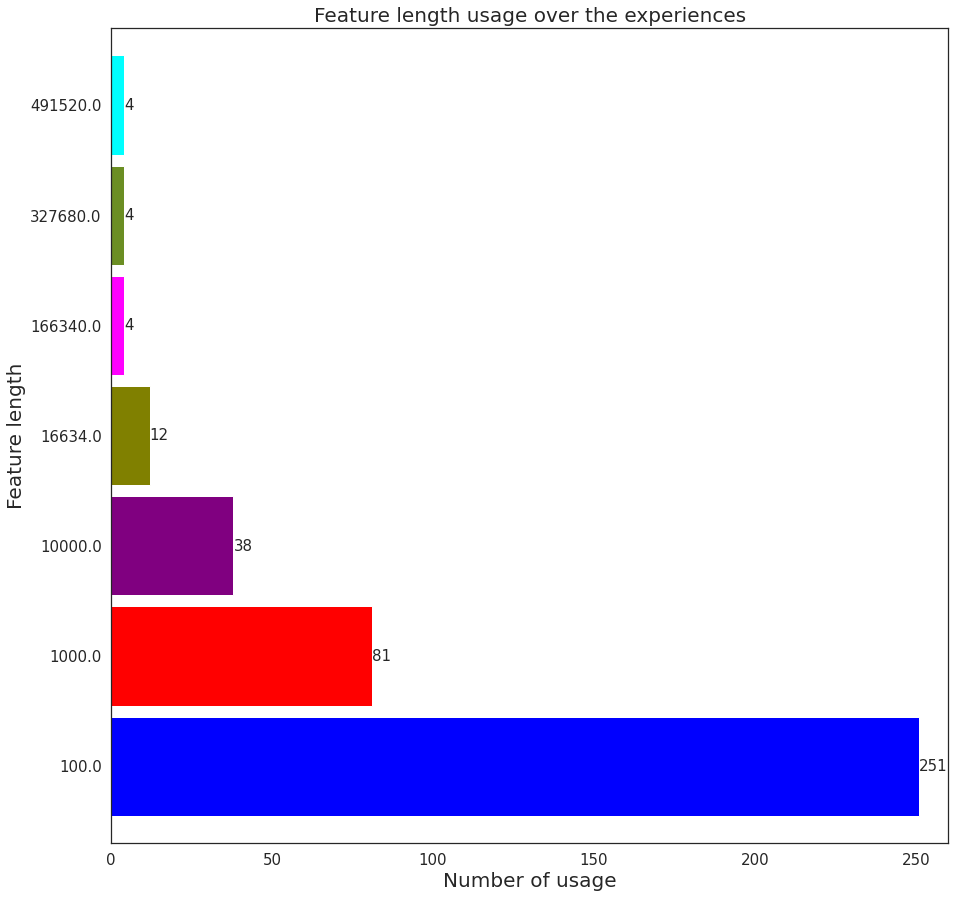

In [327]:
fig = plt.figure(figsize=(15, 15))


exp_df.loc[exp_df['Feature length'] <= 100, 'Feature length'] = 100
exp_df['Feature length'] = exp_df['Feature length'] .apply(lambda x: 1000 if x > 101 and x <= 1000 else x)
exp_df['Feature length'] = exp_df['Feature length'] .apply(lambda x: 10000 if x > 1001 and x <= 10000 else x)
# exp_df.loc[exp_df['Feature length'] < 1000] = ">= 100 < 1000"
# exp_df.loc[exp_df['Feature length'] < 10000] = ">= 1000 < 10000"

t_df=exp_df['Feature length'].value_counts().sort_index()

print(t_df)

ax = t_df.plot.barh(fontsize=15, color=color_map_filter_pink,width=0.9,edgecolor='white', linewidth=1)
ax.bar_label(ax.containers[0],fontsize=15)
ax.set_xlim([0, 260])
ax.set_ylabel("Feature length",fontsize=20)
ax.set_xlabel("Number of usage",fontsize=20)
ax.set_title("Feature length usage over the experiences",fontsize=20)

   paper_year          mean
0        2003      4.000000
1        2007           NaN
2        2011     14.500000
3        2013      5.000000
4        2014     22.500000
5        2015      8.400000
6        2016      5.500000
7        2017     10.000000
8        2018  66258.047619
9        2019    410.600000
10       2020    259.011628
11       2021     16.184615
12       2022   1313.758621


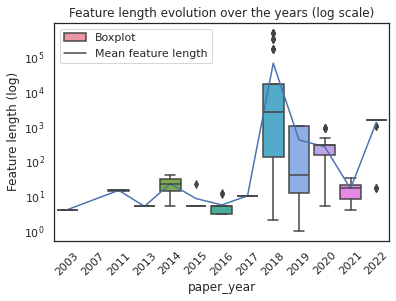

In [188]:
order=['2003','2007','2011','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
mean_feature_length_by_exp=goup_by_year_df['Feature length'].mean().reset_index(name='mean')
print(mean_feature_length_by_exp)

ax = sns.boxplot(data=exp_df, y="Feature length",x="paper_year", order=order )
ax = sns.lineplot(data=mean_feature_length_by_exp, y="mean",x="paper_year")

ax.set_yscale('log')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel("Feature length (log)")
ax.set_title("Feature length evolution over the years (log scale)")
ax.legend(labels=['Boxplot','Mean feature length'])

   paper_year          mean
0        2003      4.000000
1        2007           NaN
2        2011     14.500000
3        2013      5.000000
4        2014     22.500000
5        2015      8.400000
6        2016      5.500000
7        2017     10.000000
8        2018  66258.047619
9        2019    410.600000
10       2020    259.011628
11       2021     16.184615
12       2022   1313.758621


Text(0.5, 1.0, 'Mean Feature length evolution over the years (log scale)')

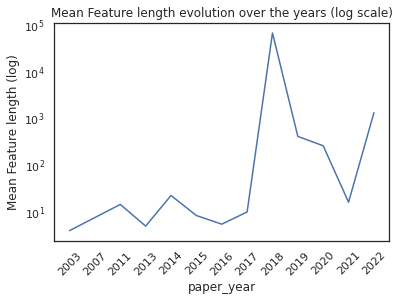

In [62]:
mean_feature_length_by_exp=goup_by_year_df['Feature length'].mean().reset_index(name='mean')
print(mean_feature_length_by_exp)

ax = sns.lineplot(data=mean_feature_length_by_exp, y="mean",x="paper_year")
ax.set_yscale('log')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel("Mean Feature length (log)")
ax.set_title("Mean Feature length evolution over the years (log scale)")


## Accuracy


In [63]:

percent_missing=((total_exp-exp_df['Accuracy'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")
exp_df['Accuracy']=exp_df['Accuracy'].str.rstrip('%').str.replace(',','.').astype('float')
exp_df['Accuracy'].describe()


percentage of missing values : 14.759535655058043%


count    514.000000
mean      88.838424
std       12.708205
min        5.500000
25%       84.220000
50%       92.275000
75%       97.262500
max      100.000000
Name: Accuracy, dtype: float64

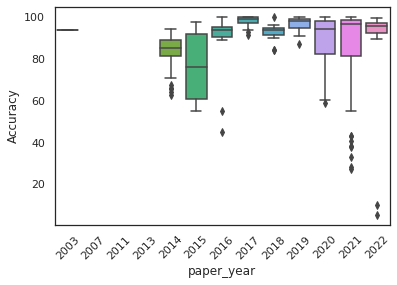

In [64]:

ax = sns.boxplot(data=exp_df, y="Accuracy",x="paper_year", order=order )
ax.tick_params(axis='x', rotation=45)

## EER


In [65]:
percent_missing=((total_exp-exp_df['EER'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")
exp_df['EER']=exp_df['EER'].str.rstrip('%').str.replace(',','.').astype('float')
exp_df['EER'].describe()

percentage of missing values : 68.49087893864014%


count    190.000000
mean      11.695105
std       11.047838
min        0.010000
25%        2.410000
50%        8.950000
75%       20.970000
max       45.000000
Name: EER, dtype: float64

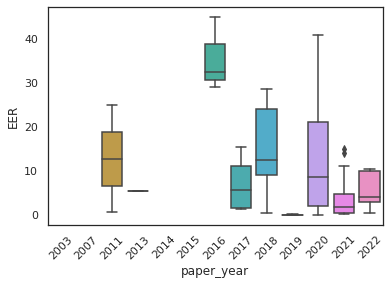

In [66]:
ax = sns.boxplot(data=exp_df, x="paper_year", y="EER",order=order)
ax.tick_params(axis='x', rotation=45)

## Lowest FMR

In [67]:
percent_missing=((total_exp-exp_df['Lowest FMR'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")
exp_df['Lowest FMR']=exp_df['Lowest FMR'].str.rstrip('%').str.replace(',','.').astype('float')
exp_df['Lowest FMR'].describe()

percentage of missing values : 99.00497512437812%


count     6.000000
mean     19.581667
std      20.069063
min       0.560000
25%       1.597500
50%      18.100000
75%      33.500000
max      46.000000
Name: Lowest FMR, dtype: float64

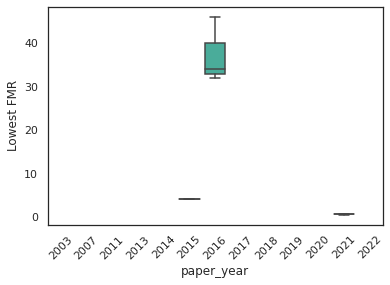

In [68]:
ax = sns.boxplot(data=exp_df, x="paper_year", y="Lowest FMR",order=order)
ax.tick_params(axis='x', rotation=45)

## Lowest FMNR

In [69]:
percent_missing=((total_exp-exp_df['Lowest FMNR'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")
exp_df['Lowest FMNR']=exp_df['Lowest FMNR'].str.rstrip('%').str.replace(',','.').astype('float')
exp_df['Lowest FMNR'].describe()

percentage of missing values : 99.00497512437812%


count     6.000000
mean     23.678333
std      16.084751
min       3.700000
25%      13.027500
50%      22.750000
75%      33.500000
max      46.000000
Name: Lowest FMNR, dtype: float64

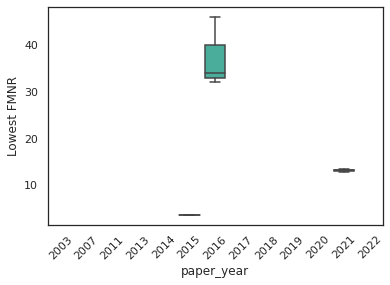

In [70]:
ax = sns.boxplot(data=exp_df, x="paper_year", y="Lowest FMNR",order=order)
ax.tick_params(axis='x', rotation=45)

## Studies comparisons

In this section we will compare the experiences that used the same dataset.

In [71]:
capno_filter=exp_df["Dataset"]=="Capnobase IEEE TBME"
# Keep only experience with Accuracy & Architecture detailed & using Capnobase filter
capnobase_df=exp_df.where(capno_filter).dropna(subset=['Dataset','Architecture','Accuracy']).reset_index(drop=True)

capnobase_df


paper              Dataset    Segmentation  \
0        donida2021biometric  Capnobase IEEE TBME     20s signals   
1        donida2021biometric  Capnobase IEEE TBME     20s signals   
2              yang2021study  Capnobase IEEE TBME  Sliding window   
3              yang2021study  Capnobase IEEE TBME  Sliding window   
4              yang2021study  Capnobase IEEE TBME  Sliding window   
..                       ...                  ...             ...   
107  karimian2017nonfiducial  Capnobase IEEE TBME    Single cycle   
108  karimian2017nonfiducial  Capnobase IEEE TBME    Single cycle   
109  karimian2017nonfiducial  Capnobase IEEE TBME    Single cycle   
110  karimian2017nonfiducial  Capnobase IEEE TBME    Single cycle   
111  karimian2017nonfiducial  Capnobase IEEE TBME    Single cycle   

               Normalization                            Noise reduction  \
0                        NaN                   band-pass filter 50-90Hz   
1                        NaN                   band-pass filter 50-90Hz   
2    Zero mean normalization                                       None   
3    Zero mean normalization                                       None   
4    Zero mean normalization                                       None   
..                       ...                                        ...   
107                      NaN  Butterworth 2nd order - band pass - 1-5Hz   
108                      NaN  Butterworth 2nd order - band pass - 1-5Hz   
109                      NaN  Butterworth 2nd order - band pass - 1-5Hz   
110                      NaN  Butterworth 2nd order - band pass - 1-5Hz   
111                      NaN  Butterworth 2nd order - band pass - 1-5Hz   

                                  Features type  Feature length  \
0    Create a spectrogram image from 3 channels            10.0   
1    Create a spectrogram image from 3 channels            10.0   
2                                   Time domain            17.0   
3                                   Time domain            17.0   
4                              Frequency domain             4.0   
..                                          ...             ...   
107                                    Fiducial            10.0   
108                                    Fiducial            10.0   
109                                  DWT domain            10.0   
110                                  DWT domain            10.0   
111                                  DWT domain            10.0   

               Feature extraction or selection methods    Algorithm type  \
0    Create a spectrogram from the PPG chanels & us...  Machine learning   
1    Create a spectrogram from the PPG chanels & us...  Machine learning   
2                          defined time domain measure  Machine learning   
3                          defined time domain measure  Machine learning   
4                            Defined frequency measure  Machine learning   
..                                                 ...               ...   
107                                     KS-test + KPCA  Machine learning   
108                                     KS-test + KPCA  Machine learning   
109                                     KS-test + KPCA  Machine learning   
110                                     KS-test + KPCA  Machine learning   
111                                     KS-test + KPCA  Machine learning   

                Architecture                   Training dataset  \
0        SVM & voting system                                50%   
1        SVM & voting system                             87,50%   
2                       LDC   80% of all signal of each subject   
3    Naives Bayes Classifier  80% of all signal of each subject   
4    Naives Bayes Classifier  80% of all signal of each subject   
..                       ...                                ...   
107                      SOM                                NaN   
108                      KNN           

In [72]:
# Accuracy fct archi

# ax = sns.boxplot(data=capnobase_df, x="Architecture", y="Accuracy",order=order)
# ax.tick_params(axis='x', rotation=45)

grp_archi=capnobase_df.drop(['Segmentation','Normalization','Noise reduction','Features type','Feature length','Feature extraction or selection methods','Algorithm type','Training dataset','Evaluation dataset','Validation method','EER','Lowest FMR','Lowest FMNR','paper_year'], axis=1).groupby('Architecture')
grp_archi.describe()


Accuracy                        \
                                                count       mean        std   
Architecture                                                                  
3-layers CNN                                      6.0  99.250000   0.893868   
3-layers CNN + LSTM                               6.0  98.466667   2.035354   
A² + Distance matching (GASF)  + t test           1.0  89.800000        NaN   
Decision Tree                                     4.0  91.250000   3.095696   
Euclidian distance                               12.0  94.408333   2.076049   
KNN                                              13.0  98.549231   1.851146   
LDA                                               1.0  98.110000        NaN   
LDC                                               7.0  94.110000   5.573948   
MLP                                               6.0  98.478333   1.870352   
NL + Distance matching (GASF)  + t test           1.0  89.500000        NaN   
Naives Bayes Classifier                          20.0  88.814500  18.720921   
RF                                                7.0  96.905714   1.877115   
ROCKET + Distance matching (GASF)  + t test       1.0  99.500000        NaN   
Random Forest                                     4.0  98.750000   0.500000   
Res2Net + Distance matching (GASF)  + t test      1.0  89.500000        NaN   
ResNet + Distance matching (GASF)  + t test       1.0  89.600000        NaN   
SENet + Distance matching (GASF)  + t test        1.0  89.700000        NaN   
SKNET + Distance matching (GASF)  + t test        1.0  89.500000        NaN   
SNL + Distance matching (GASF)  + t test          1.0  89.600000        NaN   
SOM                                               2.0  96.305000   4.730544   
SVM                                               8.0  98.303750   2.892547   
SVM & voting system                               2.0  99.095000   0.091924   
SVM with RBF                                      1.0  99.300000        NaN   
TFCMF                                             5.0  99.230000   0.307327   

                                                                      \
                                                min      25%     50%   
Architecture                                                           
3-layers CNN                                  97.90  98.7000  99.500   
3-layers CNN + LSTM                           94.90  97.7250  99.200   
A² + Distance matching (GASF)  + t test       89.80  89.8000  89.800   
Decision Tree                                 87.00  90.0000  92.000   
Euclidian distance                            90.85  93.3475  94.960   
KNN                                           93.76  98.0000  99.540   
LDA                                           98.11  98.1100  98.110   
LDC                                           83.24  92.7500  95.050   
MLP                                           95.31  97.6575  99.205   
NL + Distance matching (GASF)  + t test       89.50  89.5000  89.500   
Naives Bayes Classifier                       37.86  82.1175  98.980   
RF                                            94.05  95.7250  97.170   
ROCKET + Distance matching (GASF)  + t test   99.50  99.5000  99.500   
Random Forest                                 98.00  98.7500  99.000   
Res2Net + Distance matching (GASF)  + t test  89.50  89.5000  89.500   
ResNet + Distance matching (GASF)  + t test   89.60  89.6000  89.600   
SENet + Distance matching (GASF)  + t test    89.70  89.7000  89.700   
SKNET + Distance matching (GASF)  + t test    89.50  89.5000  89.500   
SNL + Distance matching (GASF)  + t test      89.60  89.6000  89.600   
SOM                                           92.96  94.6325  96.305   
SVM                                           91.46  98.3275  99.470   
SVM & voting system                           99.03  99.0625  99.095   
SVM with RBF                                  99.30  99.3000  99.300   
TFCMF                                  

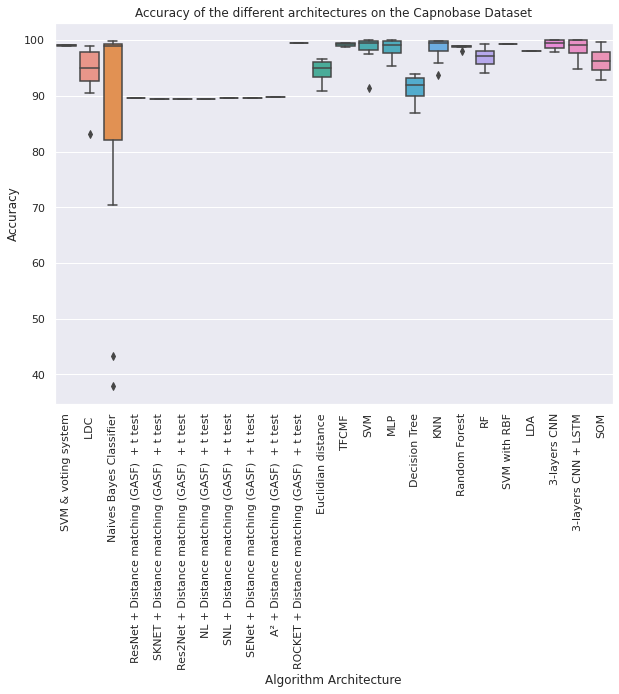

In [73]:
#grp_archi.boxplot(rot=45, fontsize=12, figsize=(8,10))

sns.set(rc={'figure.figsize':(10,7)})
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.boxplot(x='Architecture',y='Accuracy', data=capnobase_df, ax = axes)
axes.set_title('Accuracy of the different architectures on the Capnobase Dataset')
axes.yaxis.grid(True)
axes.set_xlabel('Algorithm Architecture')
axes.set_ylabel('Accuracy')
axes.tick_params(axis='x', rotation=90)
plt.plot(figsize=(15, 10))

plt.show()